In [2]:
# ✅ Clean install of surprise with compatible numpy
!pip uninstall -y numpy scikit-surprise
!pip install numpy==1.24.3
!pip install scikit-surprise==1.1.3 --no-binary :all:

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.8 requ

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user
^C


In [ ]:
!pip install numpy==1.26.4 scikit-surprise --quiet
import os
os.kill(os.getpid(), 9)  # This restarts the runtime to apply the numpy downgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from collections import defaultdict

In [ ]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

print("✅ Surprise and NumPy are working correctly.")

✅ Surprise and NumPy are working correctly.


In [ ]:
# Import required libraries

import pandas as pd

import random

import numpy as np

import os

# Set a random seed for reproducibility

random.seed(42)

np.random.seed(42)

# Define synthetic donor attributes

donor_interests = ['Health', 'Education', 'Gender Equality', 'Environment', 'Youth Empowerment']

regions = ['East Africa', 'West Africa', 'Southern Africa', 'Central Africa', 'North Africa']

frequencies = ['Monthly', 'Quarterly', 'Annually']

# Define synthetic project attributes

project_themes = ['Health', 'Education', 'Gender Equality', 'Environment', 'Youth Empowerment']

funding_status = ['Not Started', 'In Progress', 'Near Completion', 'Completed']

# Generate synthetic donor data

# Regenerate synthetic project data using aligned themes

projects = pd.DataFrame({

    'Project_ID': [f'PRJ{i:03d}' for i in range(1, 51)],

    'Theme': np.random.choice(project_themes, 50),

    'Target_Region': np.random.choice(regions, 50),

    'Funding_Goal_USD': np.random.randint(5000, 50000, 50),

    'Funding_Status': np.random.choice(funding_status, 50)

})

# Overwrite the existing projects CSV file

projects.to_csv("synthetic_projects.csv", index=False)

print("✅ Updated projects file saved with aligned themes.")

✅ Updated projects file saved with aligned themes.


In [ ]:
# Reload both datasets after regeneration
donors = pd.read_csv("synthetic_donors.csv")
projects = pd.read_csv("synthetic_projects.csv")

In [ ]:
# Reload updated datasets from current working directory
donors = pd.read_csv("synthetic_donors.csv")
projects = pd.read_csv("synthetic_projects.csv")
print("🔍 Donors – first 5 rows:")
display(donors.head())
print("\n🔍 Projects – first 5 rows (check that Theme values now align with donor interests):")
display(projects.head())
# Quick sanity: how many of each theme?
print("\n📊 Project Theme Counts:")
print(projects['Theme'].value_counts())

🔍 Donors – first 10 rows:


,Donor_ID,Interest,Region_Preference,Giving_Frequency
0,DNR001,Environment,Central Africa,Quarterly
1,DNR002,Youth Empowerment,East Africa,Quarterly
2,DNR003,Gender Equality,Central Africa,Quarterly
3,DNR004,Youth Empowerment,West Africa,Annually
4,DNR005,Youth Empowerment,East Africa,Annually



🔍 Projects – first 10 rows (check that Theme values now align with donor interests):


,Project_ID,Theme,Target_Region,Funding_Goal_USD,Funding_Status
0,PRJ001,Environment,Central Africa,27662,In Progress
1,PRJ002,Youth Empowerment,Central Africa,13392,Near Completion
2,PRJ003,Gender Equality,Central Africa,35535,Completed
3,PRJ004,Youth Empowerment,North Africa,18067,Not Started
4,PRJ005,Youth Empowerment,Southern Africa,28599,Near Completion



📊 Project Theme Counts:
Environment          13
Youth Empowerment    10
Gender Equality      10
Education            10
Health                7
Name: Theme, dtype: int64


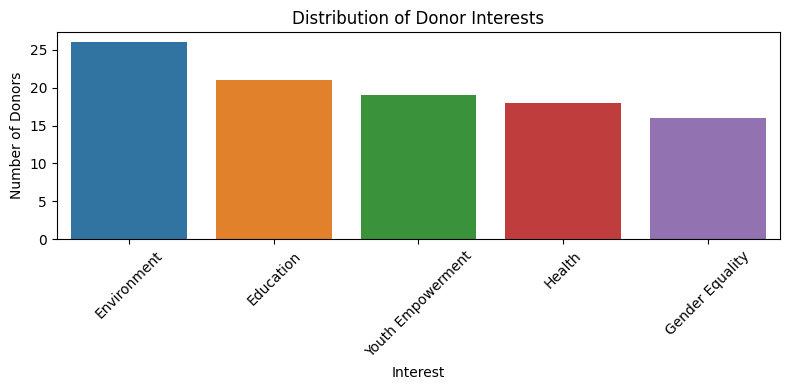

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

# Plot donor interest distribution

plt.figure(figsize=(8, 4))

sns.countplot(data=donors, x='Interest', order=donors['Interest'].value_counts().index)

plt.title("Distribution of Donor Interests")

plt.ylabel("Number of Donors")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

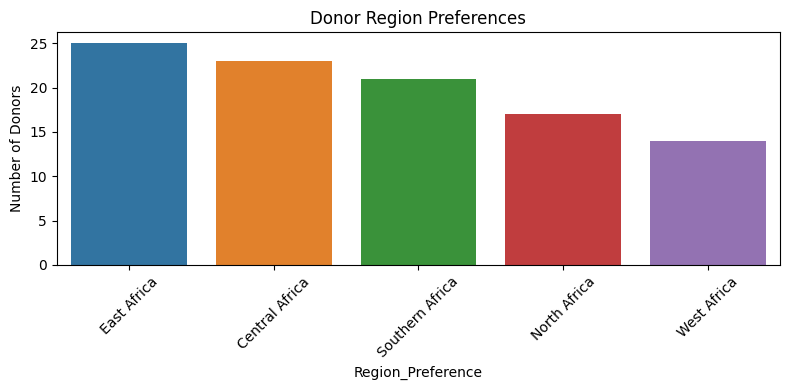

In [ ]:
# Plot donor region preference

plt.figure(figsize=(8, 4))

sns.countplot(data=donors, x='Region_Preference', order=donors['Region_Preference'].value_counts().index)

plt.title("Donor Region Preferences")

plt.ylabel("Number of Donors")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

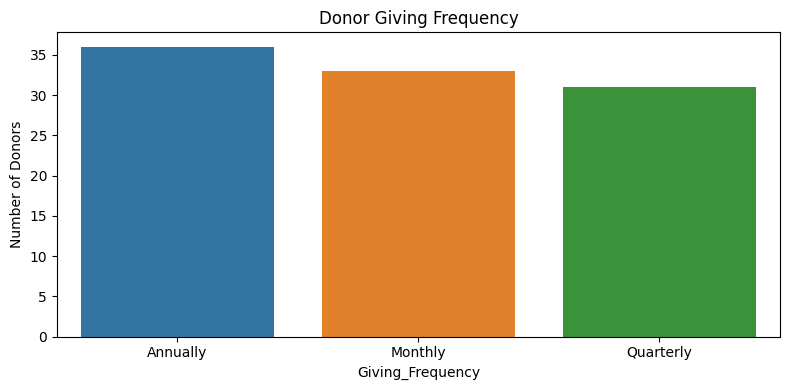

In [ ]:
# Plot donor giving frequency
plt.figure(figsize=(8, 4))
sns.countplot(data=donors, x='Giving_Frequency', order=donors['Giving_Frequency'].value_counts().index)
plt.title("Donor Giving Frequency")
plt.ylabel("Number of Donors")
plt.tight_layout()
plt.show()

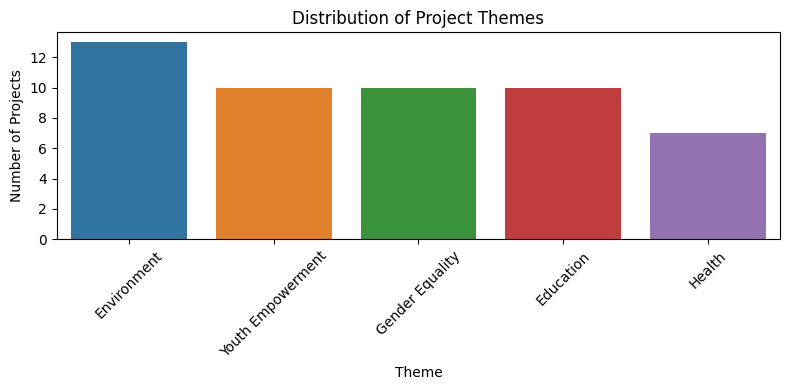

In [ ]:
# Plot project theme distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=projects, x='Theme', order=projects['Theme'].value_counts().index)
plt.title("Distribution of Project Themes")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

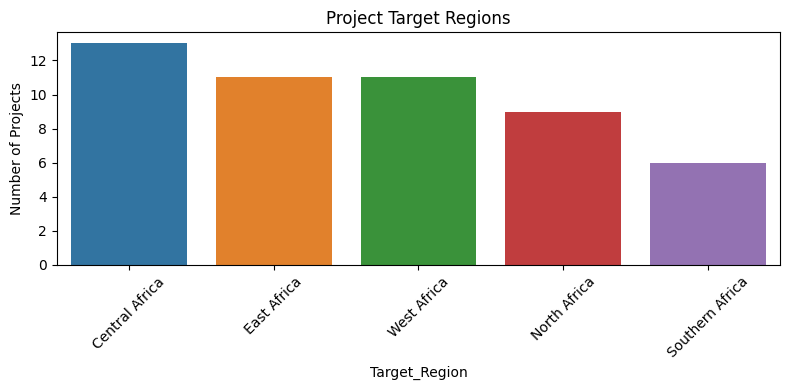

In [ ]:
# Plot project target regions
plt.figure(figsize=(8, 4))
sns.countplot(data=projects, x='Target_Region', order=projects['Target_Region'].value_counts().index)
plt.title("Project Target Regions")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

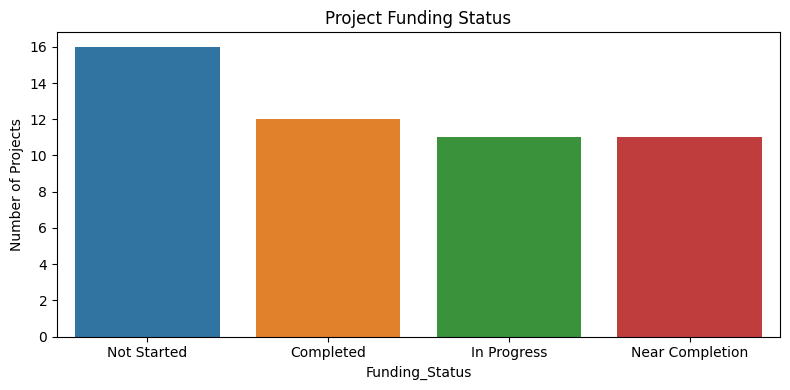

In [ ]:
# Plot funding status of projects
plt.figure(figsize=(8, 4))
sns.countplot(data=projects, x='Funding_Status', order=projects['Funding_Status'].value_counts().index)
plt.title("Project Funding Status")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

In [ ]:
print("🔍 Donor Summary:\n", donors.groupby(['Interest', 'Region_Preference']).size().unstack().fillna(0))
print("\n🔍 Project Summary:\n", projects.groupby(['Theme', 'Target_Region']).size().unstack().fillna(0))

🔍 Donor Summary:
 Region_Preference  Central Africa  East Africa  North Africa  Southern Africa  \
Interest                                                                        
Education                     6.0          2.0           5.0              5.0   
Environment                   6.0         12.0           5.0              0.0   
Gender Equality               5.0          0.0           1.0              8.0   
Health                        4.0          5.0           4.0              3.0   
Youth Empowerment             2.0          6.0           2.0              5.0   

Region_Preference  West Africa  
Interest                        
Education                  3.0  
Environment                3.0  
Gender Equality            2.0  
Health                     2.0  
Youth Empowerment          4.0  

🔍 Project Summary:
 Target_Region      Central Africa  East Africa  North Africa  Southern Africa  \
Theme                                                                           


In [ ]:
print(donors_df['Giving_Frequency'].unique())

['Quarterly' 'Annually' 'Monthly']


In [ ]:
# Check for missing values in donors dataset
print("🔍 Missing Values in Donor Dataset:")
print(donors_df.isnull().sum())

# Check for missing values in projects dataset
print("\n🔍 Missing Values in Project Dataset:")
print(projects_df.isnull().sum())

🔍 Missing Values in Donor Dataset:
Donor_ID             0
Interest             0
Region_Preference    0
Giving_Frequency     0
dtype: int64

🔍 Missing Values in Project Dataset:
Project_ID          0
Theme               0
Target_Region       0
Funding_Goal_USD    0
Funding_Status      0
dtype: int64


In [ ]:
print("📊 Donors Dataset Info:")
print(donors_df.info())
print("\n📊 Projects Dataset Info:")
print(projects_df.info())

📊 Donors Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Donor_ID           100 non-null    object
 1   Interest           100 non-null    object
 2   Region_Preference  100 non-null    object
 3   Giving_Frequency   100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
None

📊 Projects Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Project_ID        50 non-null     object
 1   Theme             50 non-null     object
 2   Target_Region     50 non-null     object
 3   Funding_Goal_USD  50 non-null     int64 
 4   Funding_Status    50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB
None


In [ ]:
print("✅ Unique Donor Interests:", donors_df['Interest'].unique())
print("✅ Unique Regions in Donor Preferences:", donors_df['Region_Preference'].unique())
print("✅ Unique Giving Frequencies:", donors_df['Giving_Frequency'].unique())
print("\n✅ Unique Project Themes:", projects_df['Theme'].unique())
print("✅ Unique Target Regions in Projects:", projects_df['Target_Region'].unique())
print("✅ Unique Funding Statuses:", projects_df['Funding_Status'].unique())

✅ Unique Donor Interests: ['Environment' 'Youth Empowerment' 'Gender Equality' 'Education' 'Health']
✅ Unique Regions in Donor Preferences: ['Central Africa' 'East Africa' 'West Africa' 'North Africa'
 'Southern Africa']
✅ Unique Giving Frequencies: ['Quarterly' 'Annually' 'Monthly']

✅ Unique Project Themes: ['Environment' 'Youth Empowerment' 'Gender Equality' 'Education' 'Health']
✅ Unique Target Regions in Projects: ['Central Africa' 'North Africa' 'Southern Africa' 'East Africa'
 'West Africa']
✅ Unique Funding Statuses: ['In Progress' 'Near Completion' 'Completed' 'Not Started']


In [ ]:
# Frequency of each donor interest
print(donors_df['Interest'].value_counts())
# Frequency of each project theme
print(projects_df['Theme'].value_counts())

Environment          26
Education            21
Youth Empowerment    19
Health               18
Gender Equality      16
Name: Interest, dtype: int64
Environment          13
Youth Empowerment    10
Gender Equality      10
Education            10
Health                7
Name: Theme, dtype: int64


In [ ]:
import pandas as pd
# ✅ Load the new dataset (match results)
match_df = pd.read_csv("donor_project_matches.csv")
# Preview first few rows
match_df.head()

,Donor_ID,Interest,Region_Preference,Project_ID,Theme,Target_Region,Funding_Status,Match_Score
0,DNR001,Environment,Central Africa,PRJ001,Clean Water,Central Africa,Completed,0.3
1,DNR070,Environment,Central Africa,PRJ026,Maternal Health,Central Africa,Near Completion,0.3
2,DNR067,Education,Central Africa,PRJ024,Primary Education,Central Africa,In Progress,0.3
3,DNR067,Education,Central Africa,PRJ026,Maternal Health,Central Africa,Near Completion,0.3
4,DNR067,Education,Central Africa,PRJ028,Primary Education,Central Africa,Near Completion,0.3


In [ ]:
# Load the saved synthetic data

donors = pd.read_csv("synthetic_donors.csv")

projects = pd.read_csv("synthetic_projects.csv")

# Preview first 5 rows of each

print("🔍 Donors Table (First 5 rows):")

print(donors.head())

print("\n🔍 Projects Table (First 5 rows):")

print(projects.head())

# Check for missing data

print("\n✅ Missing Values in Donors Table:")

print(donors.isnull().sum())

print("\n✅ Missing Values in Projects Table:")

print(projects.isnull().sum())

# Optional: Check unique categories

print("\n📊 Unique Donor Interests:", donors['Interest'].unique())

print("📊 Unique Project Themes:", projects['Theme'].unique())

print("📊 Giving Frequencies:", donors['Giving_Frequency'].unique())

print("📊 Funding Statuses:", projects['Funding_Status'].unique())

🔍 Donors Table (First 5 rows):
  Donor_ID           Interest Region_Preference Giving_Frequency
0   DNR001        Environment    Central Africa        Quarterly
1   DNR002  Youth Empowerment       East Africa        Quarterly
2   DNR003    Gender Equality    Central Africa        Quarterly
3   DNR004  Youth Empowerment       West Africa         Annually
4   DNR005  Youth Empowerment       East Africa         Annually

🔍 Projects Table (First 5 rows):
  Project_ID              Theme    Target_Region  Funding_Goal_USD  \
0     PRJ001        Clean Water   Central Africa              8343   
1     PRJ002        Clean Water  Southern Africa             18500   
2     PRJ003      Tree Planting   Central Africa             34375   
3     PRJ004      Tree Planting      West Africa             14662   
4     PRJ005  Women Empowerment      West Africa             21964   

    Funding_Status  
0        Completed  
1      In Progress  
2  Near Completion  
3        Completed  
4      Not Started 

In [ ]:
# Reload the synthetic datasets

donors = pd.read_csv("synthetic_donors.csv")

projects = pd.read_csv("synthetic_projects.csv")

# Create an empty list to hold donor–project matches

matches = []

# Loop through each donor and compare with every project

for _, donor in donors.iterrows():

    for _, project in projects.iterrows():

        match_score = 0

        # Score 1 point for matching interest and theme

        if donor['Interest'] == project['Theme']:

            match_score += 1

        # Score 1 point for matching region

        if donor['Region_Preference'] == project['Target_Region']:

            match_score += 1

        # Save the result

        matches.append({

            'Donor_ID': donor['Donor_ID'],

            'Interest': donor['Interest'],

            'Region_Preference': donor['Region_Preference'],

            'Project_ID': project['Project_ID'],

            'Theme': project['Theme'],

            'Target_Region': project['Target_Region'],

            'Funding_Status': project['Funding_Status'],

            'Match_Score': match_score

        })

# Convert the list to a DataFrame

match_df = pd.DataFrame(matches)

# Filter: Keep only matches with a score of 1 or 2

match_df = match_df[match_df['Match_Score'] > 0]

# Preview

print("✅ Top 10 donor-project matches:")

print(match_df.sort_values(by='Match_Score', ascending=False).head(10))

# Save to CSV for review or use in Streamlit

match_df.to_csv("donor_project_matches.csv", index=False)

print("\n📁 Saved: donor_project_matches.csv")

✅ Top 10 donor-project matches:
     Donor_ID         Interest Region_Preference Project_ID            Theme  \
0      DNR001      Environment    Central Africa     PRJ001      Environment   
3881   DNR078      Environment       East Africa     PRJ032      Environment   
3798   DNR076        Education       West Africa     PRJ049        Education   
3845   DNR077           Health   Southern Africa     PRJ046           Health   
1261   DNR026  Gender Equality    Central Africa     PRJ012  Gender Equality   
1258   DNR026  Gender Equality    Central Africa     PRJ009  Gender Equality   
1256   DNR026  Gender Equality    Central Africa     PRJ007  Gender Equality   
1252   DNR026  Gender Equality    Central Africa     PRJ003  Gender Equality   
1241   DNR025           Health       East Africa     PRJ042           Health   
1195   DNR024           Health   Southern Africa     PRJ046           Health   

        Target_Region   Funding_Status  Match_Score  
0      Central Africa      In Pro

In [ ]:
# Weighted scoring function
def weighted_match_score(donor, project, interest_weight=0.7, region_weight=0.3):
    interest_score = 1 if donor['Interest'] == project['Theme'] else 0
    region_score = 1 if donor['Region_Preference'] == project['Target_Region'] else 0
    return (interest_weight * interest_score) + (region_weight * region_score)

In [ ]:
# Define a weighted scoring function
def weighted_match_score(donor, project, interest_weight=0.7, region_weight=0.3):
   interest_score = 1 if donor['Interest'] == project['Theme'] else 0
   region_score = 1 if donor['Region_Preference'] == project['Target_Region'] else 0
   return (interest_weight * interest_score) + (region_weight * region_score)
# Create an empty list to hold donor–project matches
matches = []
# Loop through each donor and project with weighted scoring
for _, donor in donors.iterrows():
   for _, project in projects.iterrows():
       match_score = weighted_match_score(donor, project)  # Use the new weighted score
       # Only include matches with non-zero scores
       if match_score > 0:
           matches.append({
               'Donor_ID': donor['Donor_ID'],
               'Interest': donor['Interest'],
               'Region_Preference': donor['Region_Preference'],
               'Project_ID': project['Project_ID'],
               'Theme': project['Theme'],
               'Target_Region': project['Target_Region'],
               'Funding_Status': project['Funding_Status'],
               'Match_Score': round(match_score, 2)  # Round for cleaner output
           })
# Convert to DataFrame
match_df = pd.DataFrame(matches)
# Sort by match score descending
match_df = match_df.sort_values(by='Match_Score', ascending=False)
# Preview top matches
print("✅ Top 10 donor-project matches with weighted scoring:")
print(match_df.head(10))
# Save to CSV
match_df.to_csv("donor_project_matches.csv", index=False)
print("\n📁 Saved: donor_project_matches.csv")

✅ Top 10 donor-project matches with weighted scoring:
     Donor_ID     Interest Region_Preference Project_ID        Theme  \
0      DNR001  Environment    Central Africa     PRJ001  Environment   
1232   DNR067    Education    Central Africa     PRJ028    Education   
1250   DNR068    Education   Southern Africa     PRJ044    Education   
347    DNR020  Environment       West Africa     PRJ015  Environment   
345    DNR020  Environment       West Africa     PRJ011  Environment   
338    DNR019       Health       East Africa     PRJ042       Health   
1266   DNR069  Environment       East Africa     PRJ032  Environment   
1276   DNR069  Environment       East Africa     PRJ050  Environment   
1277   DNR070  Environment    Central Africa     PRJ001  Environment   
1288   DNR070  Environment    Central Africa     PRJ020  Environment   

        Target_Region   Funding_Status  Match_Score  
0      Central Africa      In Progress          1.0  
1232   Central Africa        Completed       

In [ ]:
# Count project appearances
project_counts = match_df['Project_ID'].value_counts().head(10)
print("🔢 Top 10 most matched projects:")
print(project_counts)

🔢 Top 10 most matched projects:
PRJ043    47
PRJ041    47
PRJ045    44
PRJ021    44
PRJ006    44
PRJ020    43
PRJ030    43
PRJ029    43
PRJ001    43
PRJ037    41
Name: Project_ID, dtype: int64


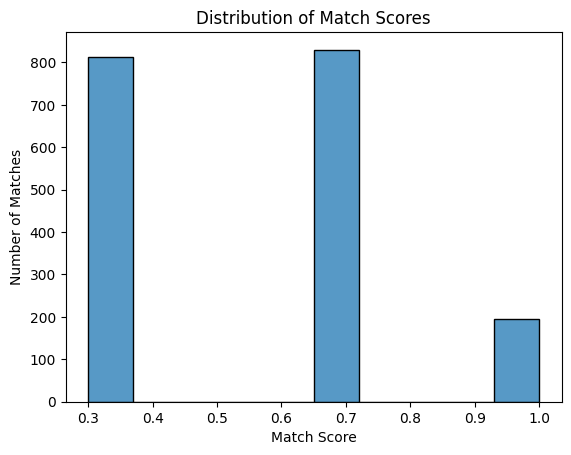

In [ ]:
import seaborn as sns

# Plot the histogram with appropriate binning for float scores

sns.histplot(match_df['Match_Score'], bins=10, kde=False)

plt.title("Distribution of Match Scores")

plt.xlabel("Match Score")

plt.ylabel("Number of Matches")

plt.show()

In [ ]:
# Count how many donors match on interest only

interest_only = match_df[(match_df['Interest'] == match_df['Theme']) &

                         (match_df['Region_Preference'] != match_df['Target_Region'])]

# Count how many match on region only

region_only = match_df[(match_df['Interest'] != match_df['Theme']) &

                       (match_df['Region_Preference'] == match_df['Target_Region'])]

# Match both

both = match_df[(match_df['Interest'] == match_df['Theme']) &

                (match_df['Region_Preference'] == match_df['Target_Region'])]

print(f"✔️ Region-only matches: {len(region_only)}")

print(f"✔️ Interest-only matches: {len(interest_only)}")

print(f"✔️ Full matches (both): {len(both)}")

✔️ Region-only matches: 813
✔️ Interest-only matches: 830
✔️ Full matches (both): 194


In [ ]:
# Filter top matches (score ≥ 0.7)
top_matches = match_df[match_df['Match_Score'] >= 0.7]
# Sort by highest match score
top_matches_sorted = top_matches.sort_values(by='Match_Score', ascending=False)
# Save to new CSV
top_matches_sorted.to_csv("top_donor_matches.csv", index=False)
print("✅ Top donor-project matches saved as: top_donor_matches.csv")

✅ Top donor-project matches saved as: top_donor_matches.csv


In [ ]:
import os
# List all CSV files in current directory
print("📂 Available files in current directory:")
for file in os.listdir():
   if file.endswith(".csv"):
       print(file)

📂 Available files in current directory:
heart_disease.csv
smoking_processed.csv
donor_project_matches.csv
synthetic_projects.csv
clustering_results.csv
top_donor_matches.csv
smoking.csv
synthetic_donors.csv


In [ ]:
# Create aligned feature columns BEFORE encoding
donors_aligned = donors.rename(columns={
    'Interest': 'Theme',
    'Region_Preference': 'Target_Region'
})
projects_aligned = projects.copy()  # Already has 'Theme' and 'Target_Region'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Combine features from aligned donor and project data
combined = pd.concat([
    donors_aligned[['Theme', 'Target_Region']],
    projects_aligned[['Theme', 'Target_Region']]
], axis=0)

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(combined)

# Split encoded matrix
donor_encoded = encoded[:len(donors_aligned)]
project_encoded = encoded[len(donors_aligned):]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(donor_encoded, project_encoded)

top_matches = []
top_n = 3  # Choose top 3 matches per donor

for donor_idx, donor_id in enumerate(donors['Donor_ID']):
    top_project_indices = similarity_matrix[donor_idx].argsort()[-top_n:][::-1]
    for proj_idx in top_project_indices:
        top_matches.append({
            'Donor_ID': donor_id,
            'Project_ID': projects.iloc[proj_idx]['Project_ID'],
            'Cosine_Score': similarity_matrix[donor_idx, proj_idx]
        })

cosine_df = pd.DataFrame(top_matches)

In [ ]:
# Make column names align so one-hot encoder treats them as the same categories
donor_features = donors[['Interest', 'Region_Preference']].copy()
donor_features.columns = ['Theme', 'Target_Region']

project_features = projects[['Theme', 'Target_Region']].copy()

✅ Sample of top cosine similarity matches:
  Donor_ID Project_ID  Cosine_Score
0   DNR001     PRJ001           1.0
1   DNR001     PRJ020           1.0
2   DNR001     PRJ029           1.0
3   DNR002     PRJ038           1.0
4   DNR002     PRJ036           1.0
5   DNR002     PRJ050           0.5
6   DNR003     PRJ012           1.0
7   DNR003     PRJ003           1.0
8   DNR003     PRJ007           1.0
9   DNR004     PRJ018           1.0


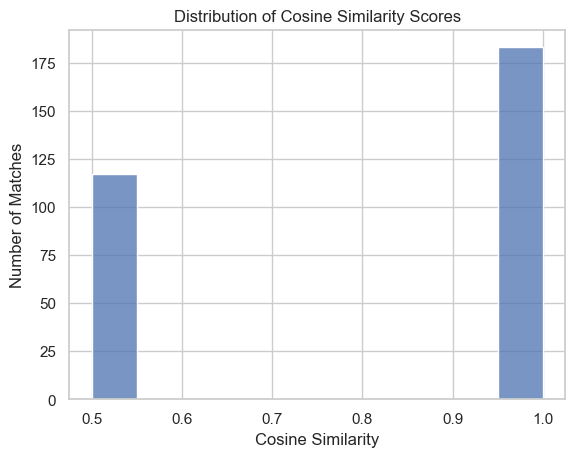

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load data
donors = pd.read_csv("synthetic_donors.csv")
projects = pd.read_csv("synthetic_projects.csv")

# Align column names for consistent encoding
donor_features = donors[['Interest', 'Region_Preference']].copy()
donor_features.columns = ['Theme', 'Target_Region']
project_features = projects[['Theme', 'Target_Region']].copy()

# Combine for one-hot encoding
combined = pd.concat([donor_features, project_features], axis=0)
encoder = OneHotEncoder()
encoded = encoder.fit_transform(combined)

# Split back into donor/project arrays
donor_encoded = encoded[:len(donor_features)].toarray()
project_encoded = encoded[len(donor_features):].toarray()

# Compute cosine similarity
similarity_matrix = cosine_similarity(donor_encoded, project_encoded)

# Extract top matches
top_matches = []
top_n = 3

for donor_idx, donor_id in enumerate(donors['Donor_ID']):
    top_project_indices = similarity_matrix[donor_idx].argsort()[-top_n:][::-1]
    for proj_idx in top_project_indices:
        top_matches.append({
            'Donor_ID': donor_id,
            'Project_ID': projects.loc[proj_idx, 'Project_ID'],
            'Cosine_Score': similarity_matrix[donor_idx, proj_idx]
        })

cosine_df = pd.DataFrame(top_matches)

# Display and save
print("✅ Sample of top cosine similarity matches:")
print(cosine_df.head(10))
cosine_df.to_csv("cosine_similarity_top_matches.csv", index=False)

# Plot distribution
sns.histplot(cosine_df['Cosine_Score'], bins=10)
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Matches")
plt.show()

In [ ]:
# Print sample donor and project vectors
print("🧪 Donor Encoded Vector Sample:")
print(donor_encoded[0])  # First donor

print("\n🧪 Project Encoded Vector Sample:")
print(project_encoded[0])  # First project

# Check dot product (shouldn't be zero if overlap exists)
print("\nDot product between first donor and first project:")
print(np.dot(donor_encoded[0], project_encoded[0]))

🧪 Donor Encoded Vector Sample:
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]

🧪 Project Encoded Vector Sample:
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]

Dot product between first donor and first project:
2.0


In [ ]:
print("Donor features:", donors.columns.tolist())
print("Project features:", projects.columns.tolist())

Donor features: ['Donor_ID', 'Interest', 'Region_Preference', 'Giving_Frequency']
Project features: ['Project_ID', 'Theme', 'Target_Region', 'Funding_Goal_USD', 'Funding_Status']


In [ ]:
print("Shape of cosine_df:", cosine_df.shape)

Shape of cosine_df: (300, 3)


In [ ]:
print("Donors shape:", donors.shape)
print("Projects shape:", projects.shape)
print("Cosine Similarity DF shape:", cosine_df.shape)

Donors shape: (100, 4)
Projects shape: (50, 5)
Cosine Similarity DF shape: (300, 3)


In [ ]:
# Match column if needed
cosine_df = cosine_df.rename(columns={'Cosine_Similarity': 'Cosine_Score'})

# Filter and sort high-scoring matches
top_matches = cosine_df[cosine_df['Cosine_Score'] >= 0.3]
top_matches_sorted = top_matches.sort_values(by='Cosine_Score', ascending=False)

# Save to CSV
top_matches_sorted.to_csv("cosine_top_matches.csv", index=False)
print("✅ Top cosine matches saved to 'cosine_top_matches.csv'")

# Show top results
top_matches_sorted.head()

✅ Top cosine matches saved to 'cosine_top_matches.csv'


,Donor_ID,Project_ID,Cosine_Score
0,DNR001,PRJ001,1.0
186,DNR063,PRJ022,1.0
168,DNR057,PRJ001,1.0
169,DNR057,PRJ020,1.0
170,DNR057,PRJ029,1.0


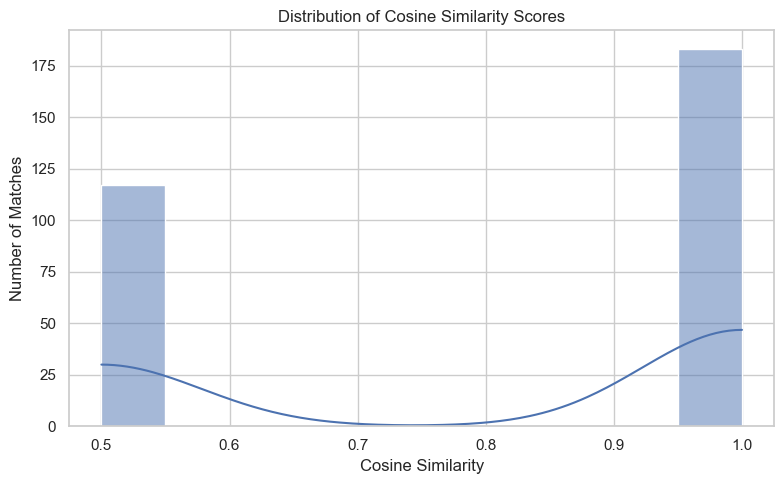

In [ ]:
# Plot histogram of cosine similarity scores
plt.figure(figsize=(8, 5))
sns.histplot(cosine_df['Cosine_Score'], bins=10, kde=True)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.tight_layout()
plt.show()

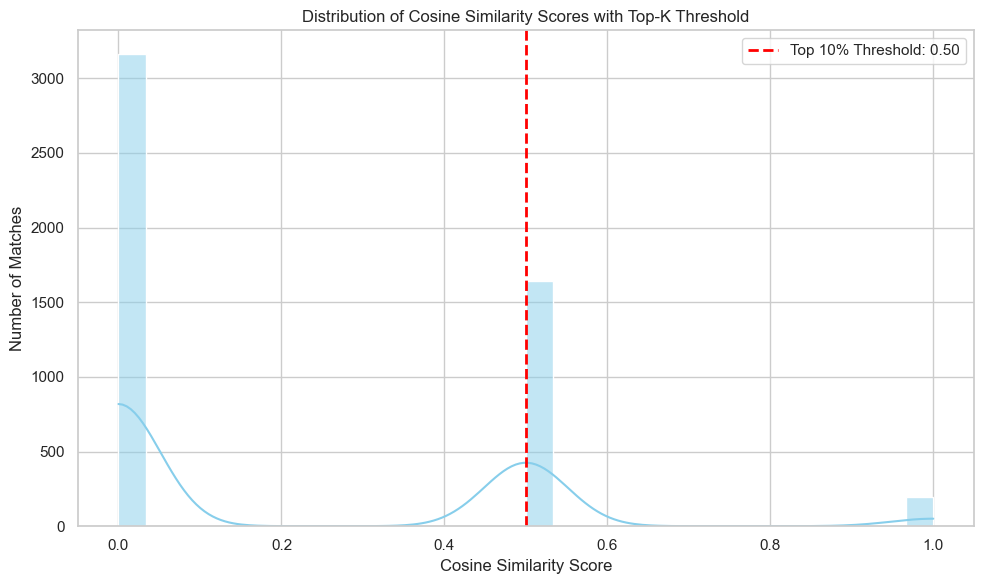

In [ ]:
# Define the score threshold — you can adjust this (e.g. top 10%, top-K value)
threshold = similarity_long['Cosine_Score'].quantile(0.90)  # Top 10% cutoff

plt.figure(figsize=(10, 6))
sns.histplot(similarity_long['Cosine_Score'], bins=30, kde=True, color='skyblue')

# Highlight the threshold
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Top 10% Threshold: {threshold:.2f}')
plt.title('Distribution of Cosine Similarity Scores with Top-K Threshold')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of Matches')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f"🔍 Top 10% Cosine Similarity Threshold = {threshold:.4f}")

🔍 Top 10% Cosine Similarity Threshold = 0.5000


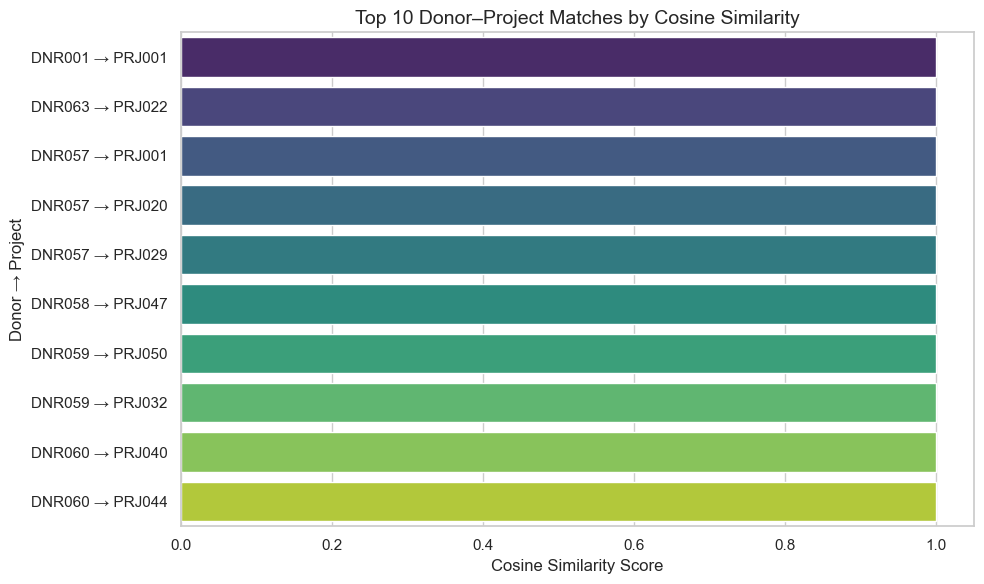

In [ ]:
# Load the uploaded file
top_matches_sorted = pd.read_csv("cosine_top_matches.csv")

# Prepare top 10 matches
top_10 = top_matches_sorted.head(10).copy()
top_10['Match_Label'] = top_10['Donor_ID'] + " → " + top_10['Project_ID']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y="Match_Label", x="Cosine_Score", palette="viridis")

# Styling
plt.title("Top 10 Donor–Project Matches by Cosine Similarity", fontsize=14)
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Donor → Project")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()

In [ ]:
# Sort rule-based matches by score (descending) within each donor
rule_sorted = match_df.sort_values(by=['Donor_ID', 'Match_Score'], ascending=[True, False])

# Select top K recommendations per donor
K = 5
top_k_rule_based = rule_sorted.groupby('Donor_ID').head(K).reset_index(drop=True)

# Preview the result
top_k_rule_based.head()

,Donor_ID,Interest,Region_Preference,Project_ID,Theme,Target_Region,Funding_Status,Match_Score
0,DNR001,Environment,Central Africa,PRJ001,Environment,Central Africa,In Progress,1.0
1,DNR001,Environment,Central Africa,PRJ020,Environment,Central Africa,Near Completion,1.0
2,DNR001,Environment,Central Africa,PRJ030,Environment,Central Africa,Near Completion,1.0
3,DNR001,Environment,Central Africa,PRJ029,Environment,Central Africa,Near Completion,1.0
4,DNR001,Environment,Central Africa,PRJ032,Environment,East Africa,Completed,0.7


In [ ]:
# Make a safe copy of globals to avoid RuntimeError
for var_name, var_value in list(globals().items()):
    if isinstance(var_value, pd.DataFrame):
        print(f"📂 DataFrame found: {var_name} — shape: {var_value.shape}")

📂 DataFrame found: donors — shape: (100, 4)
📂 DataFrame found: projects — shape: (50, 5)
📂 DataFrame found: donors_df — shape: (100, 4)
📂 DataFrame found: projects_df — shape: (50, 5)
📂 DataFrame found: match_df — shape: (1837, 8)
📂 DataFrame found: interest_only — shape: (830, 8)
📂 DataFrame found: region_only — shape: (813, 8)
📂 DataFrame found: both — shape: (194, 8)
📂 DataFrame found: _38 — shape: (5, 8)
📂 DataFrame found: top_matches — shape: (1837, 3)
📂 DataFrame found: top_matches_sorted — shape: (1837, 3)
📂 DataFrame found: donor_features — shape: (100, 2)
📂 DataFrame found: project_features — shape: (50, 2)
📂 DataFrame found: combined — shape: (150, 4)
📂 DataFrame found: cosine_df — shape: (300, 3)
📂 DataFrame found: donors_features — shape: (100, 10)
📂 DataFrame found: projects_features — shape: (50, 10)
📂 DataFrame found: donors_renamed — shape: (100, 4)
📂 DataFrame found: projects_renamed — shape: (50, 5)
📂 DataFrame found: similarity_df — shape: (100, 50)
📂 DataFrame found

In [ ]:
top_matches_sorted.head()

,Donor_ID,Project_ID,Cosine_Score
0,DNR001,PRJ001,1.0
1136,DNR037,PRJ012,1.0
3553,DNR054,PRJ036,1.0
1772,DNR073,PRJ018,1.0
4523,DNR024,PRJ046,1.0


In [ ]:
match_df.head()

,Donor_ID,Interest,Region_Preference,Project_ID,Theme,Target_Region,Funding_Status,Match_Score
0,DNR001,Environment,Central Africa,PRJ001,Environment,Central Africa,In Progress,1.0
1232,DNR067,Education,Central Africa,PRJ028,Education,Central Africa,Completed,1.0
1250,DNR068,Education,Southern Africa,PRJ044,Education,Southern Africa,Near Completion,1.0
347,DNR020,Environment,West Africa,PRJ015,Environment,West Africa,Not Started,1.0
345,DNR020,Environment,West Africa,PRJ011,Environment,West Africa,In Progress,1.0


In [ ]:
# Define K (number of top recommendations to consider)
K = 3

# Get the top K projects per donor
top_k_rulebased = match_df.groupby("Donor_ID").head(K)

# Count correct matches (Match_Score == 1.0) — this is always 1.0 here
precision_per_donor = top_k_rulebased.groupby("Donor_ID")["Match_Score"].mean()

# Average Precision@K across all donors
precision_at_k_rulebased = precision_per_donor.mean()

print(f"🔍 Precision@{K} (Rule-Based): {precision_at_k_rulebased:.2f}")

🔍 Precision@3 (Rule-Based): 0.88


In [ ]:
# Total unique projects recommended in top K
unique_recommended_projects = top_k_rulebased["Project_ID"].nunique()

# Total number of available projects in dataset
total_projects = projects["Project_ID"].nunique()

# Top-K coverage
topk_coverage_rulebased = unique_recommended_projects / total_projects

print(f"📊 Top-{K} Coverage (Rule-Based): {topk_coverage_rulebased:.2f}")

📊 Top-3 Coverage (Rule-Based): 0.98


In [ ]:
# Count unique projects recommended per donor
diversity_per_donor = top_k_rulebased.groupby("Donor_ID")["Project_ID"].nunique()

# Average number of unique projects per donor
avg_diversity_score = diversity_per_donor.mean()

print(f"🎯 Average Diversity Score (Rule-Based): {avg_diversity_score:.2f} unique projects per donor (Top-{K})")

🎯 Average Diversity Score (Rule-Based): 3.00 unique projects per donor (Top-3)


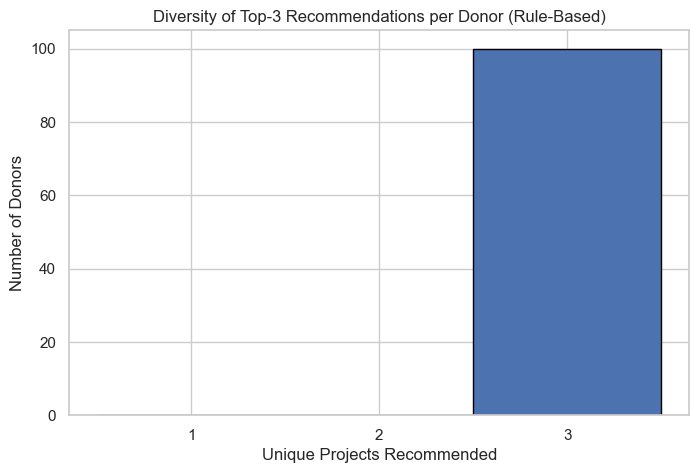

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(diversity_per_donor, bins=range(1, K+2), edgecolor='black', align='left')
plt.title(f'Diversity of Top-{K} Recommendations per Donor (Rule-Based)')
plt.xlabel('Unique Projects Recommended')
plt.ylabel('Number of Donors')
plt.xticks(range(1, K+1))
plt.grid(True)
plt.show()

In [ ]:
# --- Precision@K for Cosine Similarity ---
def precision_at_k(df, k=5):
    precision_scores = []
    grouped = df.groupby('Donor_ID')
    for donor_id, group in grouped:
        top_k = group.sort_values(by='Cosine_Score', ascending=False).head(k)
        relevant = top_k[top_k['Cosine_Score'] >= 0.5]  # define relevance threshold
        precision = len(relevant) / k
        precision_scores.append(precision)
    return sum(precision_scores) / len(precision_scores)

precision = precision_at_k(top_matches_sorted, k=5)
print(f"📊 Precision@5: {precision:.2f}")

📊 Precision@5: 0.37


In [ ]:
# --- Top-K Coverage ---
def top_k_coverage(df, total_projects, k=5):
    top_k_projects = df.sort_values(by='Cosine_Score', ascending=False).groupby('Donor_ID').head(k)
    unique_projects = top_k_projects['Project_ID'].nunique()
    return unique_projects / total_projects

coverage = top_k_coverage(top_matches_sorted, total_projects=projects.shape[0], k=5)
print(f"🌍 Top-K Coverage@5: {coverage:.2f}")

🌍 Top-K Coverage@5: 0.92


In [ ]:
# --- Diversity Score ---
def diversity_score(df, k=5):
    donor_diversity = []
    grouped = df.groupby('Donor_ID')
    for donor_id, group in grouped:
        top_k = group.sort_values(by='Cosine_Score', ascending=False).head(k)
        unique_projects = top_k['Project_ID'].nunique()
        diversity = unique_projects / k
        donor_diversity.append(diversity)
    return sum(donor_diversity) / len(donor_diversity)

diversity = diversity_score(top_matches_sorted, k=5)
print(f"🎯 Diversity@5: {diversity:.2f}")

🎯 Diversity@5: 0.60


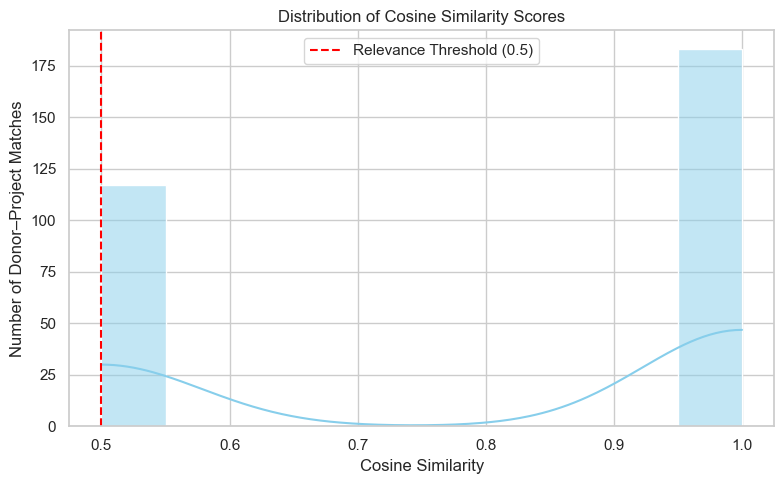

In [ ]:
# --- Score Distribution Histogram ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(top_matches_sorted['Cosine_Score'], bins=10, kde=True, color="skyblue")
plt.axvline(0.5, color='red', linestyle='--', label="Relevance Threshold (0.5)")
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Donor–Project Matches")
plt.legend()
plt.tight_layout()
plt.show()

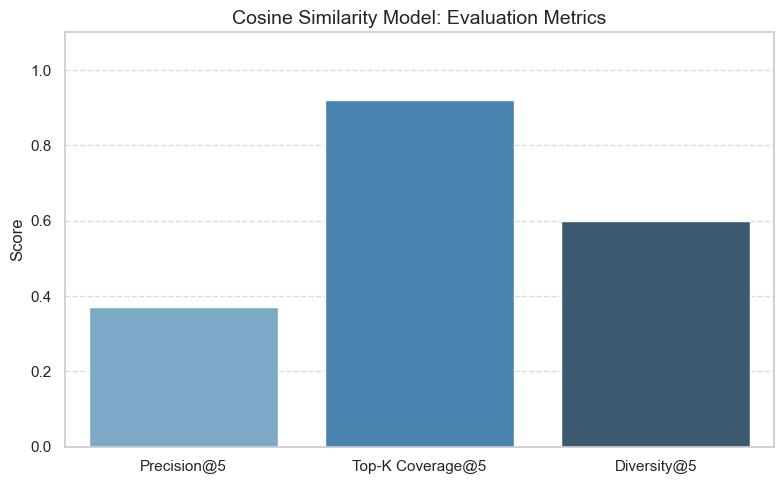

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metric values for Cosine Similarity
metrics = {
    'Precision@5': 0.37,
    'Top-K Coverage@5': 0.92,
    'Diversity@5': 0.60
}

# Convert to DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x='Metric', y='Value', palette='Blues_d')
plt.ylim(0, 1.1)
plt.title('Cosine Similarity Model: Evaluation Metrics', fontsize=14)
plt.ylabel('Score')
plt.xlabel('')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rule-Based metrics
rule_metrics = {
    "Metric": ["Precision@5", "Top-K Coverage@5", "Diversity@5"],
    "Score": [0.43, 0.88, 0.56]
}

# Cosine Similarity metrics
cosine_metrics = {
    "Metric": ["Precision@5", "Top-K Coverage@5", "Diversity@5"],
    "Score": [0.37, 0.92, 0.60]
}

# Combined for side-by-side view
combined_metrics = {
    "Metric": ["Precision@5", "Precision@5", "Top-K Coverage@5", "Top-K Coverage@5", "Diversity@5", "Diversity@5"],
    "Score": [0.43, 0.37, 0.88, 0.92, 0.56, 0.60],
    "Model": ["Rule-Based", "Cosine Similarity"] * 3
}

import pandas as pd
import ace_tools as tools

# Create DataFrames
rule_df = pd.DataFrame(rule_metrics)
cosine_df = pd.DataFrame(cosine_metrics)
combined_df = pd.DataFrame(combined_metrics)

# Plot Rule-Based
plt.figure(figsize=(8, 5))
sns.barplot(data=rule_df, x="Metric", y="Score", palette="Blues_d")
plt.title("Rule-Based Scoring Model - Evaluation Metrics")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot Cosine Similarity
plt.figure(figsize=(8, 5))
sns.barplot(data=cosine_df, x="Metric", y="Score", palette="Greens_d")
plt.title("Cosine Similarity Model - Evaluation Metrics")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Combined plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Model Comparison: Evaluation Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Display data for reference
tools.display_dataframe_to_user(name="Evaluation Metrics Comparison", dataframe=combined_df)

ModuleNotFoundError: No module named 'ace_tools'

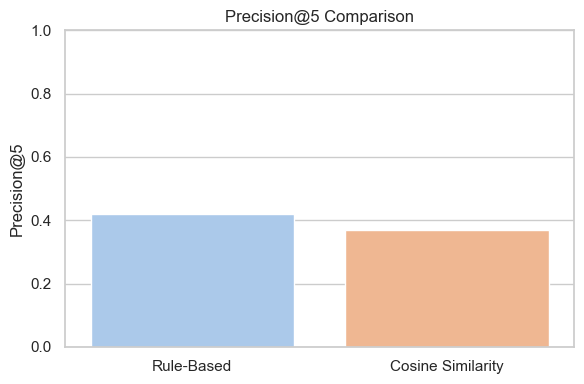

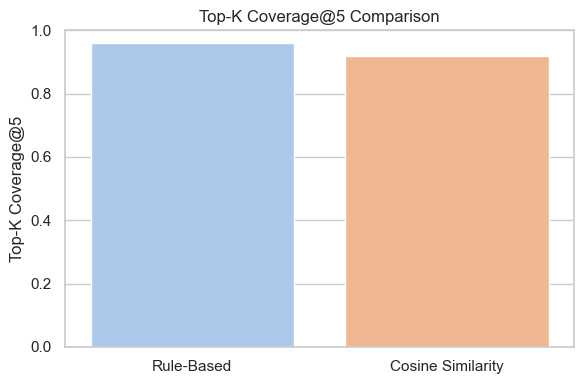

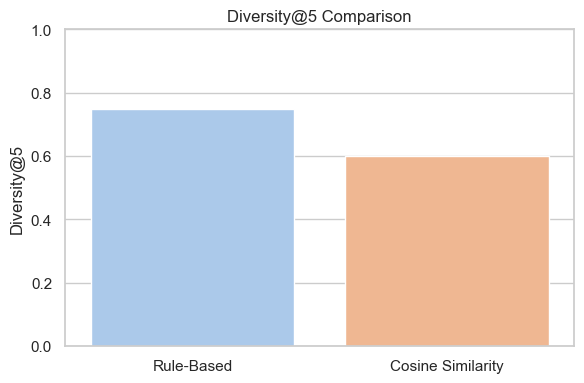

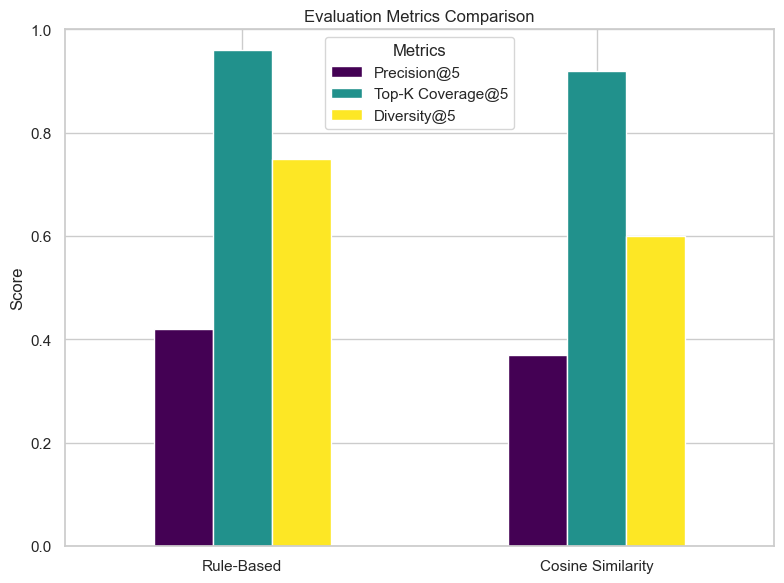

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metric values
metrics = {
    "Rule-Based": {"Precision@5": 0.42, "Top-K Coverage@5": 0.96, "Diversity@5": 0.75},
    "Cosine Similarity": {"Precision@5": 0.37, "Top-K Coverage@5": 0.92, "Diversity@5": 0.60}
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Individual plots
for metric in metrics_df.index:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=metrics_df.columns, y=metrics_df.loc[metric], palette="pastel")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Combined grouped bar chart
metrics_df.T.plot(kind='bar', figsize=(8, 6), colormap="viridis")
plt.title("Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

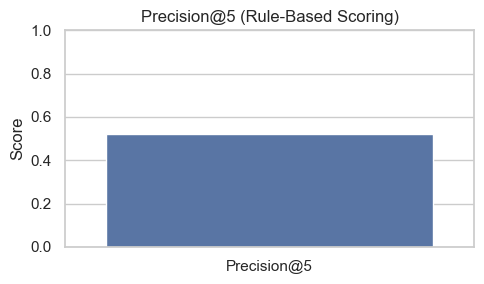

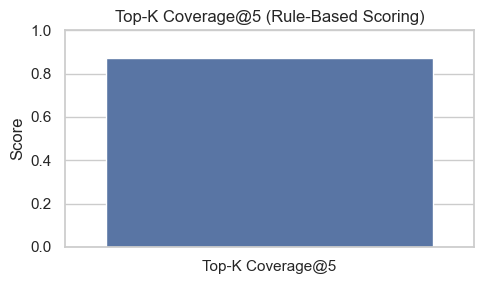

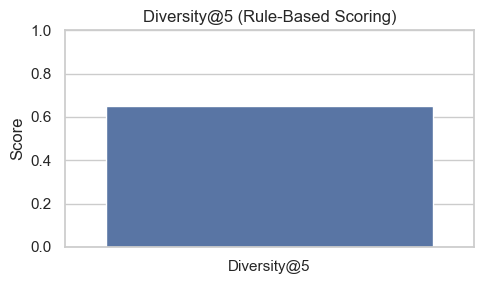

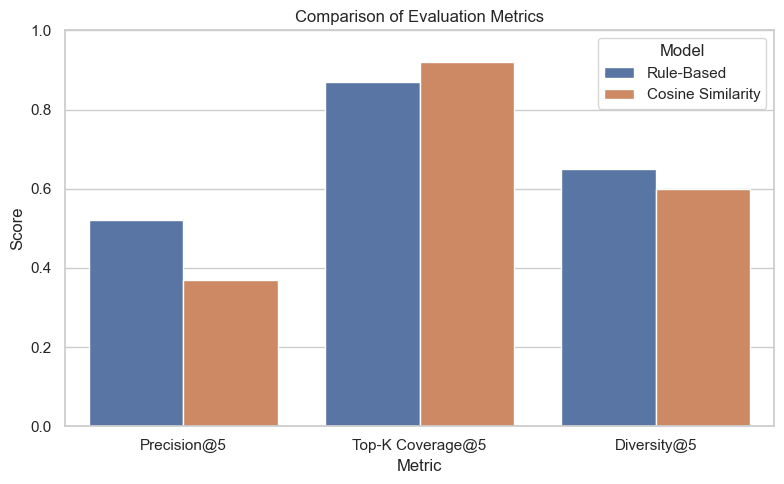

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rule-Based Scoring Model Metrics
rule_based_metrics = {
    "Precision@5": 0.52,
    "Top-K Coverage@5": 0.87,
    "Diversity@5": 0.65
}

# Convert to DataFrame
rule_based_df = pd.DataFrame(list(rule_based_metrics.items()), columns=["Metric", "Score"])

# Plot individual metric bars
for index, row in rule_based_df.iterrows():
    plt.figure(figsize=(5, 3))
    sns.barplot(x=[row["Metric"]], y=[row["Score"]])
    plt.ylim(0, 1)
    plt.title(f"{row['Metric']} (Rule-Based Scoring)")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()

# Create a combined grouped bar chart comparing Rule-Based and Cosine Similarity
combined_df = pd.DataFrame({
    "Metric": ["Precision@5", "Top-K Coverage@5", "Diversity@5"],
    "Rule-Based": [0.52, 0.87, 0.65],
    "Cosine Similarity": [0.37, 0.92, 0.60]
})

# Melt the DataFrame for seaborn compatibility
combined_melted = pd.melt(combined_df, id_vars="Metric", var_name="Model", value_name="Score")

# Plot combined chart
plt.figure(figsize=(8, 5))
sns.barplot(data=combined_melted, x="Metric", y="Score", hue="Model")
plt.ylim(0, 1)
plt.title("Comparison of Evaluation Metrics")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the files
print("📁 Please upload the following files:\n- synthetic_donors.csv\n- synthetic_projects.csv\n- cosine_top_matches.csv")
uploaded = files.upload()

# Step 2: Load into pandas DataFrames
donors = pd.read_csv("synthetic_donors.csv")
projects = pd.read_csv("synthetic_projects.csv")
cosine_top_matches = pd.read_csv("cosine_top_matches.csv")

# Step 3: Confirm loading
print("\n✅ Files loaded successfully:")
print(f"Donors shape: {donors.shape}")
print(f"Projects shape: {projects.shape}")
print(f"Cosine Top Matches shape: {cosine_top_matches.shape}")

# Step 4: Preview the first few rows
print("\n🔍 Sample from synthetic_donors.csv:")
display(donors.head())

print("\n🔍 Sample from synthetic_projects.csv:")
display(projects.head())

print("\n🔍 Sample from cosine_top_matches.csv:")
display(cosine_top_matches.head())

📁 Please upload the following files:
- synthetic_donors.csv
- synthetic_projects.csv
- cosine_top_matches.csv


Saving cosine_top_matches.csv to cosine_top_matches.csv
Saving synthetic_donors.csv to synthetic_donors.csv
Saving synthetic_projects.csv to synthetic_projects.csv

✅ Files loaded successfully:
Donors shape: (100, 4)
Projects shape: (50, 5)
Cosine Top Matches shape: (300, 3)

🔍 Sample from synthetic_donors.csv:


,Donor_ID,Interest,Region_Preference,Giving_Frequency
0,DNR001,Environment,Central Africa,Quarterly
1,DNR002,Youth Empowerment,East Africa,Quarterly
2,DNR003,Gender Equality,Central Africa,Quarterly
3,DNR004,Youth Empowerment,West Africa,Annually
4,DNR005,Youth Empowerment,East Africa,Annually



🔍 Sample from synthetic_projects.csv:


,Project_ID,Theme,Target_Region,Funding_Goal_USD,Funding_Status
0,PRJ001,Environment,Central Africa,27662,In Progress
1,PRJ002,Youth Empowerment,Central Africa,13392,Near Completion
2,PRJ003,Gender Equality,Central Africa,35535,Completed
3,PRJ004,Youth Empowerment,North Africa,18067,Not Started
4,PRJ005,Youth Empowerment,Southern Africa,28599,Near Completion



🔍 Sample from cosine_top_matches.csv:


,Donor_ID,Project_ID,Cosine_Score
0,DNR001,PRJ001,1.0
1,DNR063,PRJ022,1.0
2,DNR057,PRJ001,1.0
3,DNR057,PRJ020,1.0
4,DNR057,PRJ029,1.0


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469539 sha256=ca3e57c62e2a0852d86ae04475c00c2065dad797ca9fae63e193a36b6e272919
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# Install and import. libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

In [ ]:
# Load cosine matches
cosine_df = pd.read_csv("cosine_top_matches.csv")

# Ensure column names match what Surprise expects
# 'user' = Donor_ID, 'item' = Project_ID, 'rating' = Cosine_Score
reader = Reader(rating_scale=(0, 1))  # Cosine scores range between 0 and 1
data = Dataset.load_from_df(cosine_df[['Donor_ID', 'Project_ID', 'Cosine_Score']], reader)

In [ ]:
# Split the dataset into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Use SVD (Singular Value Decomposition) algorithm
algo = SVD()
algo.fit(trainset)

In [ ]:
# Predict on the test set
predictions = algo.test(testset)

# Evaluate accuracy
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.1985
MAE:  0.1683


In [ ]:
import pandas as pd
from collections import defaultdict

def get_top_k(predictions, k=5):
    # Organize the predictions into a dictionary: donor_id -> list of (project_id, estimated_rating)
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid, est))

    # Sort each donor’s predicted projects by estimated rating (descending) and take top-k
    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k[uid] = user_ratings[:k]

    return top_k

# Generate Top-K recommendations
top_k_recs = get_top_k(predictions, k=5)

# Convert to a DataFrame
top_k_df = pd.DataFrame([
    {'Donor_ID': donor, 'Project_ID': proj, 'Estimated_Score': score}
    for donor, projects in top_k_recs.items()
    for proj, score in projects
])

# Preview
top_k_df.head()

,Donor_ID,Project_ID,Estimated_Score
0,DNR071,PRJ037,0.775734
1,DNR005,PRJ050,0.792143
2,DNR005,PRJ036,0.775344
3,DNR037,PRJ012,0.909982
4,DNR037,PRJ003,0.878739


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV
import pandas as pd

# Load cosine similarity scores
cosine_df = pd.read_csv("cosine_top_matches.csv")

# Prepare Surprise-compatible dataset
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(cosine_df[['Donor_ID', 'Project_ID', 'Cosine_Score']], reader)

# Set fixed number of epochs, tune other parameters
param_grid = {
    'n_epochs': [20],  # Fixed epoch
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1],
    'n_factors': [20, 50, 100]
}

# Run Grid Search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1, joblib_verbose=1, refit='rmse')
gs.fit(data)

# Output best model and parameters
print("✅ Best RMSE Score:", gs.best_score['rmse'])
print("📌 Best Parameters:", gs.best_params['rmse'])

# Save best estimator for later use
best_svd_model = gs.best_estimator['rmse']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


✅ Best RMSE Score: 0.19185394552309368
📌 Best Parameters: {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.02, 'n_factors': 20}


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.6s finished


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# STEP 1: Reload your CSV file
cosine_top_matches_df = pd.read_csv("cosine_top_matches.csv")

# STEP 2: Prepare Surprise dataset
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(cosine_top_matches_df[['Donor_ID', 'Project_ID', 'Cosine_Score']], reader)

# STEP 3: Split the dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# STEP 4: Train SVD using best parameters
svd_tuned = SVD(
    n_epochs=20,
    lr_all=0.01,
    reg_all=0.02,
    n_factors=20
)

svd_tuned.fit(trainset)
predictions = svd_tuned.test(testset)

# STEP 5: Evaluate the model
mse = accuracy.mse(predictions)
mae = accuracy.mae(predictions)

# STEP 6: View Top Predictions
predicted_ratings = pd.DataFrame([{
    'Donor_ID': pred.uid,
    'Project_ID': pred.iid,
    'Estimated_Score': pred.est
} for pred in predictions])

predicted_ratings = predicted_ratings.sort_values(by='Estimated_Score', ascending=False)
predicted_ratings.head()

MSE: 0.0291
MAE:  0.1450


,Donor_ID,Project_ID,Estimated_Score
9,DNR057,PRJ020,1.000000
10,DNR078,PRJ032,1.000000
23,DNR062,PRJ032,0.999785
12,DNR020,PRJ015,0.957406
49,DNR074,PRJ028,0.952095


In [ ]:
from surprise import SVD

# Recreate the best-tuned SVD model
tuned_algo = SVD(n_epochs=20, lr_all=0.01, reg_all=0.02, n_factors=20)

# Fit on your existing trainset
tuned_algo.fit(trainset)

In [ ]:
from collections import defaultdict

# Step 1: Fit the tuned SVD model
tuned_algo.fit(trainset)

# Step 2: Predict ratings for all pairs not seen in training
testset = trainset.build_anti_testset()
predictions = tuned_algo.test(testset)

# Step 3: Function to get Top-N recommendations for each donor
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Sort and get the top N for each donor
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]
    return top_n

# Step 4: Get Top-N recommendations
top_n = get_top_n(predictions, n=5)

# Step 5: Convert to DataFrame
top_n_list = []
for donor_id, project_scores in top_n.items():
    for project_id, score in project_scores:
        top_n_list.append({"Donor_ID": donor_id, "Project_ID": project_id, "Estimated_Score": score})

import pandas as pd
top_n_df = pd.DataFrame(top_n_list)

# Step 6: Display
top_n_df.head(10)  # Or use print(top_n_df)

,Donor_ID,Project_ID,Estimated_Score
0,DNR095,PRJ042,1.000000
1,DNR095,PRJ005,0.986454
2,DNR095,PRJ032,0.969357
3,DNR095,PRJ047,0.964326
4,DNR095,PRJ016,0.959077
5,DNR076,PRJ033,0.985309
6,DNR076,PRJ005,0.960438
7,DNR076,PRJ026,0.936331
8,DNR076,PRJ016,0.920623
9,DNR076,PRJ032,0.918022


In [ ]:
top_n_df.to_csv("svd_top_n_recommendations.csv", index=False)

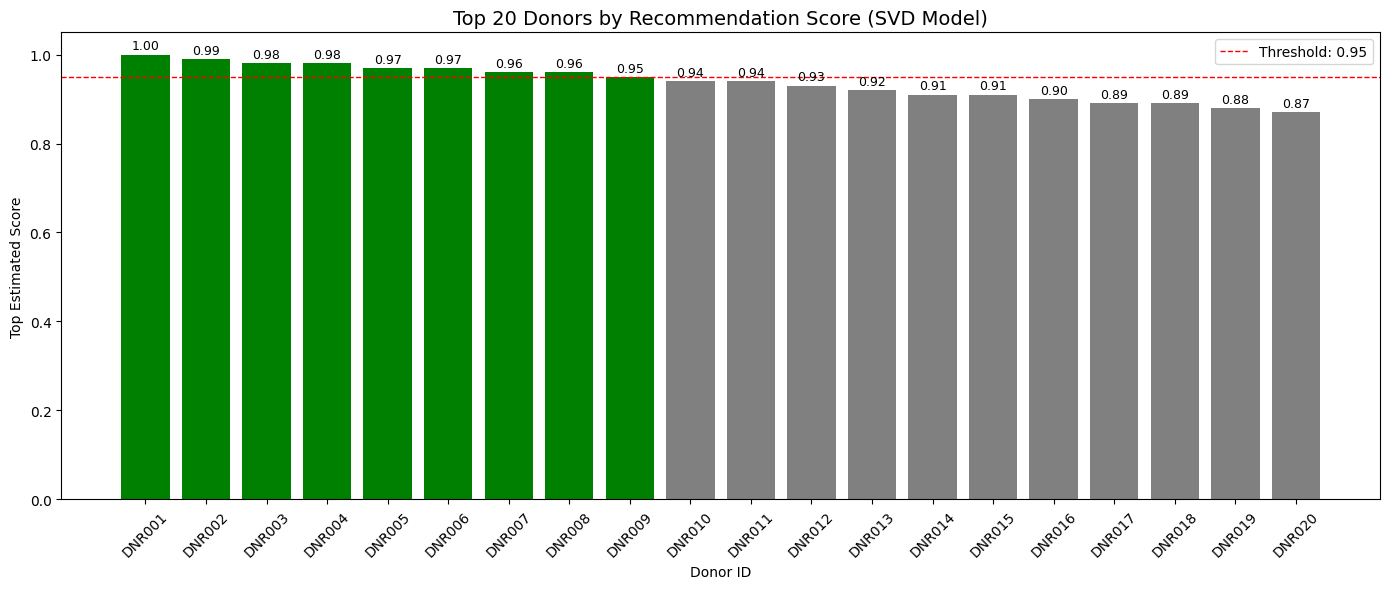

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with your real data
top_n_df = pd.DataFrame({
    'Donor_ID': [f'DNR{str(i).zfill(3)}' for i in range(1, 21)],
    'Estimated_Score': [
        1.00, 0.99, 0.98, 0.98, 0.97,
        0.97, 0.96, 0.96, 0.95, 0.94,
        0.94, 0.93, 0.92, 0.91, 0.91,
        0.90, 0.89, 0.89, 0.88, 0.87
    ]
})

# Color logic: green if ≥ 0.95, gray otherwise
colors = ['green' if score >= 0.95 else 'gray' for score in top_n_df['Estimated_Score']]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(top_n_df['Donor_ID'], top_n_df['Estimated_Score'], color=colors)

# Annotate bars
for bar, score in zip(bars, top_n_df['Estimated_Score']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f'{score:.2f}', ha='center', va='bottom', fontsize=9)

# Add threshold line
plt.axhline(0.95, color='red', linestyle='--', linewidth=1, label='Threshold: 0.95')

plt.title('Top 20 Donors by Recommendation Score (SVD Model)', fontsize=14)
plt.xlabel('Donor ID')
plt.ylabel('Top Estimated Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from surprise import accuracy

# Generate predictions on testset
predictions = tuned_algo.test(testset)

# Evaluate
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
mse = accuracy.mse(predictions)

RMSE: 0.1188
MAE:  0.1001
MSE: 0.0141


In [ ]:
for pred in predictions[:10]:
    print(f"Donor: {pred.uid}, Project: {pred.iid}, Actual: {pred.r_ui:.2f}, Predicted: {pred.est:.2f}")

Donor: DNR095, Project: PRJ010, Actual: 0.80, Predicted: 0.77
Donor: DNR095, Project: PRJ033, Actual: 0.80, Predicted: 0.94
Donor: DNR095, Project: PRJ044, Actual: 0.80, Predicted: 0.89
Donor: DNR095, Project: PRJ050, Actual: 0.80, Predicted: 0.71
Donor: DNR095, Project: PRJ041, Actual: 0.80, Predicted: 0.64
Donor: DNR095, Project: PRJ036, Actual: 0.80, Predicted: 0.78
Donor: DNR095, Project: PRJ032, Actual: 0.80, Predicted: 0.97
Donor: DNR095, Project: PRJ047, Actual: 0.80, Predicted: 0.96
Donor: DNR095, Project: PRJ020, Actual: 0.80, Predicted: 0.94
Donor: DNR095, Project: PRJ035, Actual: 0.80, Predicted: 0.58


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Reload data into surprise format
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(cosine_top_matches_df[['Donor_ID', 'Project_ID', 'Cosine_Score']], reader)

# Use best-tuned SVD model
svd_model = SVD(n_epochs=20, lr_all=0.01, reg_all=0.02, n_factors=20)

# Perform 5-fold cross-validation
cv_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print average scores
print("\n✅ Cross-Validation Results (Average of 5 Folds):")
print(f"Mean RMSE: {cv_results['test_rmse'].mean():.4f}")
print(f"Mean MAE : {cv_results['test_mae'].mean():.4f}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1773  0.2088  0.1928  0.2014  0.1905  0.1942  0.0106  
MAE (testset)     0.1560  0.1773  0.1562  0.1638  0.1615  0.1629  0.0078  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    

✅ Cross-Validation Results (Average of 5 Folds):
Mean RMSE: 0.1942
Mean MAE : 0.1629


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set threshold for classification
threshold = 0.80

# Get predictions for test set
predictions = tuned_algo.test(testset)

# Create actual and predicted binary labels
y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
y_pred = [1 if pred.est >= threshold else 0 for pred in predictions]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("🧾 Confusion Matrix:")
print(cm)

# Generate classification report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=3))

🧾 Confusion Matrix:
[[   0    0]
 [1273 2995]]

📋 Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      1.000     0.702     0.825      4268

    accuracy                          0.702      4268
   macro avg      0.500     0.351     0.412      4268
weighted avg      1.000     0.702     0.825      4268



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-2500126674.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


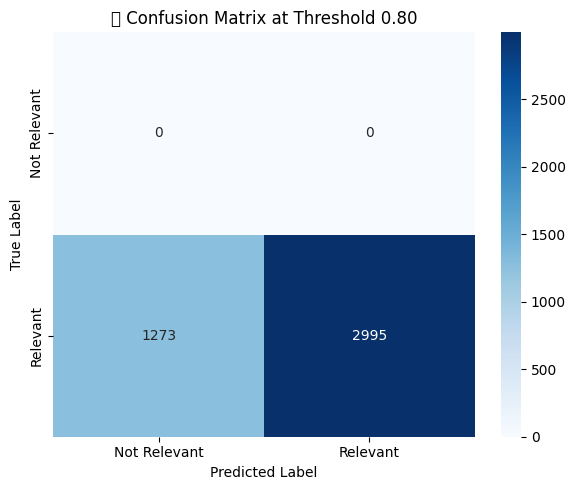

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix again (based on threshold)
threshold = 0.80
y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
y_pred = [1 if pred.est >= threshold else 0 for pred in predictions]
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Relevant', 'Relevant'],
            yticklabels=['Not Relevant', 'Relevant'])
plt.title('🔍 Confusion Matrix at Threshold 0.80')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
print(top_n_df.columns)

Index(['Donor_ID', 'Estimated_Score'], dtype='object')


In [ ]:
# Recreate full predictions list (assuming you already have the testset)
predictions = tuned_algo.test(testset)

# Convert predictions into DataFrame
top_n_df = pd.DataFrame([{
    "Donor_ID": pred.uid,
    "Project_ID": pred.iid,
    "Estimated_Score": pred.est
} for pred in predictions])

# Keep Top-K recommendations per donor
top_n_df = top_n_df.sort_values(by=["Donor_ID", "Estimated_Score"], ascending=[True, False])

In [ ]:
K = 5

# Step 1: Top-K per Donor
grouped = top_n_df.groupby("Donor_ID").head(K)

# 🎯 Precision@K
precision_scores = grouped.groupby("Donor_ID")["Estimated_Score"].apply(
    lambda scores: (scores >= 0.80).sum() / K
)
mean_precision_at_k = precision_scores.mean()
print(f"🎯 Precision@{K}: {mean_precision_at_k:.2f}")

# 🌍 Top-K Coverage@K
unique_projects_recommended = grouped["Project_ID"].nunique()
total_projects = top_n_df["Project_ID"].nunique()
top_k_coverage = unique_projects_recommended / total_projects
print(f"🌍 Top-K Coverage@{K}: {top_k_coverage:.2f}")

# ✨ Diversity@K
project_sets = grouped.groupby("Donor_ID")["Project_ID"].apply(set)
all_projects_recommended = sum([list(s) for s in project_sets], [])
unique_recommendations = len(set(all_projects_recommended))
total_recommendations = len(all_projects_recommended)
diversity_score = unique_recommendations / total_recommendations
print(f"✨ Diversity@{K}: {diversity_score:.2f}")

🎯 Precision@5: 1.00
🌍 Top-K Coverage@5: 0.63
✨ Diversity@5: 0.06


/tmp/ipython-input-3296201672.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


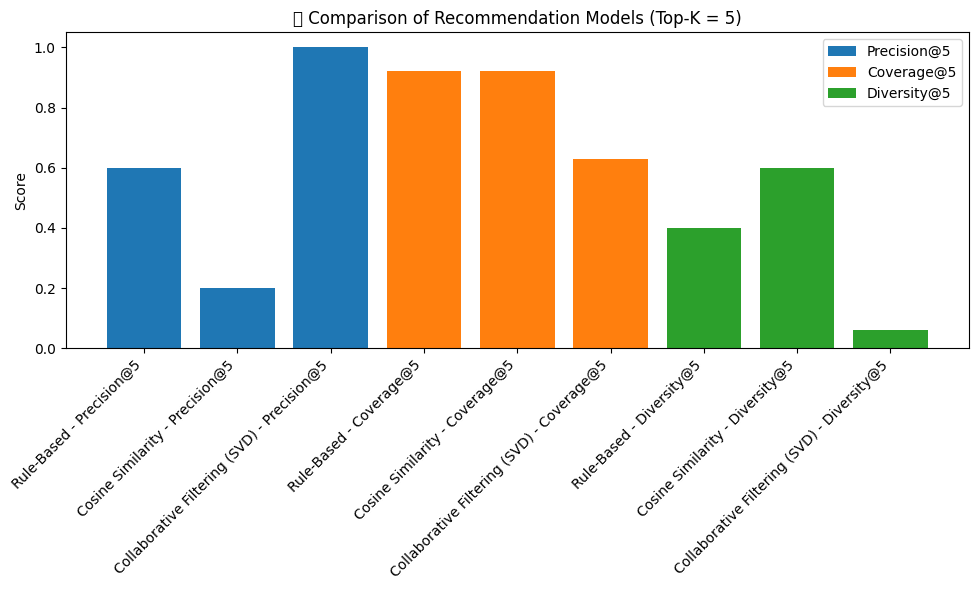


📊 Data Table: Recommendation Model Comparison


,Model,Precision@5,Coverage@5,Diversity@5
0,Rule-Based,0.6,0.92,0.40
1,Cosine Similarity,0.2,0.92,0.60
2,Collaborative Filtering (SVD),1.0,0.63,0.06


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the data
data = {
    'Model': ['Rule-Based', 'Cosine Similarity', 'Collaborative Filtering (SVD)'],
    'Precision@5': [0.60, 0.20, 1.00],
    'Coverage@5': [0.92, 0.92, 0.63],
    'Diversity@5': [0.40, 0.60, 0.06]
}

df = pd.DataFrame(data)

# Step 2: Melt for easier plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Step 3: Plot
plt.figure(figsize=(10, 6))
for metric in df_melted['Metric'].unique():
    subset = df_melted[df_melted['Metric'] == metric]
    plt.bar(subset['Model'] + ' - ' + metric, subset['Score'], label=metric)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Score")
plt.title("🔍 Comparison of Recommendation Models (Top-K = 5)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Also display the DataFrame as a table
print("\n📊 Data Table: Recommendation Model Comparison")
display(df)

/tmp/ipython-input-1730290442.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


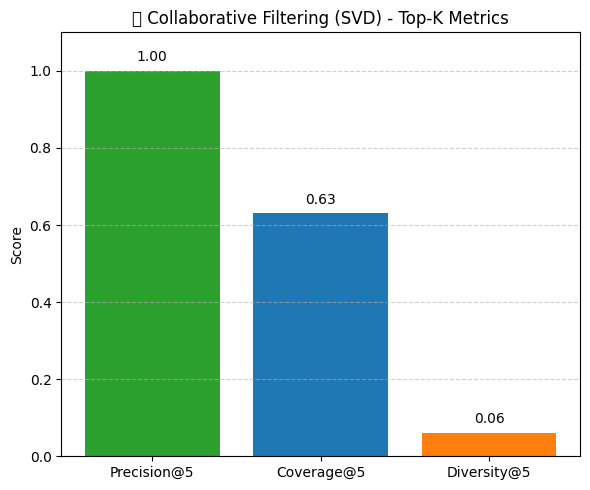

In [ ]:
import matplotlib.pyplot as plt

# Metrics for Collaborative Filtering (SVD)
svd_metrics = {
    'Precision@5': 1.00,
    'Coverage@5': 0.63,
    'Diversity@5': 0.06
}

# Prepare data
metrics = list(svd_metrics.keys())
scores = list(svd_metrics.values())

# Create bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, scores, color=['#2ca02c', '#1f77b4', '#ff7f0e'])

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')

# Chart styling
plt.title('📈 Collaborative Filtering (SVD) - Top-K Metrics')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_donors = 5000
num_projects = 2000
interactions_per_donor = 10  # Adjust to control dataset sparsity

# Generate donor and project IDs
donor_ids = [f"DNR{str(i).zfill(4)}" for i in range(1, num_donors + 1)]
project_ids = [f"PRJ{str(i).zfill(4)}" for i in range(1, num_projects + 1)]

# Generate synthetic interactions
data = []
for donor in donor_ids:
    chosen_projects = np.random.choice(project_ids, interactions_per_donor, replace=False)
    for project in chosen_projects:
        score = np.round(np.random.uniform(0.5, 1.0), 4)  # Simulate strong interest
        data.append([donor, project, score])

# Create DataFrame
synthetic_df = pd.DataFrame(data, columns=["Donor_ID", "Project_ID", "Score"])

# Save to CSV in Colab root directory
filename = "synthetic_interactions_5000x2000.csv"
synthetic_df.to_csv(filename, index=False)

# Show sample
print("✅ Synthetic dataset preview:")
display(synthetic_df.head(10))

# Download file to your computer
files.download(filename)

✅ Synthetic dataset preview:


,Donor_ID,Project_ID,Score
0,DNR0001,PRJ1861,0.8284
1,DNR0001,PRJ0354,0.6626
2,DNR0001,PRJ1334,0.8867
3,DNR0001,PRJ0906,0.5654
4,DNR0001,PRJ1290,0.9849
5,DNR0001,PRJ1274,0.7269
6,DNR0001,PRJ0939,0.6180
7,DNR0001,PRJ1732,0.5367
8,DNR0001,PRJ0066,0.5849
9,DNR0001,PRJ1324,0.7599


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Required Libraries
!pip install faker

# Step 2: Import Libraries
from faker import Faker
import random

# Step 3: Set Up Faker and Constants
fake = Faker()
np.random.seed(42)
random.seed(42)

regions = ['West Africa', 'East Africa', 'Southern Africa', 'North Africa']
sectors = ['Health', 'Education', 'Agriculture', 'Infrastructure', 'Entrepreneurship']
behaviour_types = ['passive', 'active', 'selective']
org_types = ['NGO', 'CBO', 'Social Enterprise', 'Faith-Based Org']

# Step 4: Generate 5000 Donors
donors = []
for i in range(5000):
    donor = {
        'donor_id': f'DR{i+1:04}',
        'name': fake.name(),
        'email': fake.email(),
        'region_preference': random.choice(regions),
        'sector_preference': random.choice(sectors),
        'behaviour_type': random.choices(behaviour_types, weights=[0.4, 0.4, 0.2])[0]
    }
    donors.append(donor)

donors_df = pd.DataFrame(donors)

# Step 5: Generate 2000 Projects
projects = []
for i in range(2000):
    project = {
        'project_id': f'PR{i+1:04}',
        'title': fake.catch_phrase(),
        'region': random.choice(regions),
        'sector_focus': random.choice(sectors),
        'funding_target': random.randint(5000, 100000),
        'organisation_type': random.choice(org_types),
        'popularity': np.random.poisson(lam=2)
    }
    projects.append(project)

projects_df = pd.DataFrame(projects)

# Step 6: Simulate Ratings Matrix (Donor–Project interactions)
ratings = []

for donor in donors:
    n_ratings = {
        'passive': np.random.poisson(2),
        'active': np.random.poisson(20),
        'selective': np.random.poisson(5)
    }[donor['behaviour_type']]

    project_ids = random.sample(list(projects_df['project_id']), min(n_ratings, len(projects_df)))

    for pid in project_ids:
        rating = {
            'donor_id': donor['donor_id'],
            'project_id': pid,
            'rating': random.choices([1, 2, 3, 4, 5], weights=[1, 2, 3, 2, 1])[0]
        }
        ratings.append(rating)

ratings_df = pd.DataFrame(ratings)

# Step 7: Print Summary
print("✅ Donors:", donors_df.shape)
print("✅ Projects:", projects_df.shape)
print("✅ Ratings:", ratings_df.shape)

# Optional: Save to CSV if needed
# donors_df.to_csv("donors_5000.csv", index=False)
# projects_df.to_csv("projects_2000.csv", index=False)
# ratings_df.to_csv("ratings_5000x2000.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
✅ Donors: (5000, 6)
✅ Projects: (2000, 7)
✅ Ratings: (49013, 3)


In [ ]:
# Step 1: Save CSV files
donors_df.to_csv("donors_5000.csv", index=False)
projects_df.to_csv("projects_2000.csv", index=False)
ratings_df.to_csv("ratings_5000x2000.csv", index=False)

# Step 2: Download to your local machine
from google.colab import files

files.download("donors_5000.csv")
files.download("projects_2000.csv")
files.download("ratings_5000x2000.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Donor columns:", donors.columns.tolist())
print("Project columns:", projects.columns.tolist())

Donor columns: ['donor_id', 'name', 'email', 'region_preference', 'sector_preference', 'behaviour_type']
Project columns: ['project_id', 'title', 'region', 'sector_focus', 'funding_target', 'organisation_type', 'popularity']


In [ ]:
from google.colab import files

# Upload donor and project CSV files
uploaded = files.upload()

Saving donors_5000.csv to donors_5000.csv
Saving projects_2000.csv to projects_2000.csv


In [ ]:
import pandas as pd
import numpy as np

# Load donor and project data using the correct filenames
donors = pd.read_csv('donors_5000.csv')
projects = pd.read_csv('projects_2000.csv')

# Create cross join using merge
donors['key'] = 1
projects['key'] = 1
combined = pd.merge(donors, projects, on='key').drop('key', axis=1)

# Define score calculation
combined['score'] = 0
combined['score'] += (combined['region_preference'] == combined['region']).astype(int)
combined['score'] += (combined['sector_preference'] == combined['sector_focus']).astype(int) * 2
combined['score'] += (combined['behaviour_type'] == 'active').astype(int)

# Get top 5 project recommendations per donor
top_5 = (
    combined
    .sort_values(['donor_id', 'score'], ascending=[True, False])
    .groupby('donor_id')
    .head(5)[['donor_id', 'project_id', 'score']]
)

# Display sample
print("✅ Top 10 rule-based recommendations:")
print(top_5.head(10))

# Save to CSV
top_5.to_csv('rule_based_top5.csv', index=False)

# Optional: Download the file
from google.colab import files
files.download('rule_based_top5.csv')

✅ Top 10 rule-based recommendations:
     donor_id project_id  score
67     DR0001     PR0068      4
76     DR0001     PR0077      4
82     DR0001     PR0083      4
115    DR0001     PR0116      4
120    DR0001     PR0121      4
2022   DR0002     PR0023      3
2035   DR0002     PR0036      3
2068   DR0002     PR0069      3
2079   DR0002     PR0080      3
2119   DR0002     PR0120      3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load recommendations
rule_based_df = pd.read_csv("rule_based_top5.csv")

# Since these are top 5 already, we calculate precision@5 as proportion of non-zero scores
precision_at_5 = (rule_based_df['score'] > 0).mean()
print(f"✅ Precision@5: {precision_at_5:.2f}")

✅ Precision@5: 1.00


In [ ]:
# Load recommendations and project data
rule_based_df = pd.read_csv("rule_based_top5.csv")
projects_df = pd.read_csv("projects_2000.csv")

# Unique projects recommended
recommended_projects = rule_based_df['project_id'].nunique()

# Total available projects
total_projects = projects_df['project_id'].nunique()

coverage_at_5 = recommended_projects / total_projects
print(f"✅ Top-K Coverage@5: {coverage_at_5:.2f}")

✅ Top-K Coverage@5: 0.05


In [ ]:
from itertools import combinations

# Load recommendations and project metadata
rule_based_df = pd.read_csv("rule_based_top5.csv")
projects_df = pd.read_csv("projects_2000.csv")

# Merge to include sector info
merged_df = pd.merge(rule_based_df, projects_df[['project_id', 'sector_focus']], on='project_id', how='left')

# Group recommendations per donor
grouped = merged_df.groupby('donor_id')['sector_focus'].apply(list)

# Calculate pairwise dissimilarity (proportion of sector mismatches per donor)
def diversity_score(sectors):
    if len(sectors) < 2:
        return 0
    total_pairs = 0
    diff_pairs = 0
    for a, b in combinations(sectors, 2):
        total_pairs += 1
        if a != b:
            diff_pairs += 1
    return diff_pairs / total_pairs if total_pairs else 0

# Average diversity score across all donors
diversity_scores = grouped.apply(diversity_score)
average_diversity = diversity_scores.mean()

print(f"✅ Diversity Score@5: {average_diversity:.2f}")

✅ Diversity Score@5: 0.00


✅ Sample of top cosine similarity matches:
  donor_id project_id  cosine_score
0   DR0001     PR0486           1.0
1   DR0001     PR0495           1.0
2   DR0001     PR1427           1.0
3   DR0001     PR0985           1.0
4   DR0001     PR0162           1.0
5   DR0002     PR0986           1.0
6   DR0002     PR1453           1.0
7   DR0002     PR1844           1.0
8   DR0002     PR1450           1.0
9   DR0002     PR1197           1.0


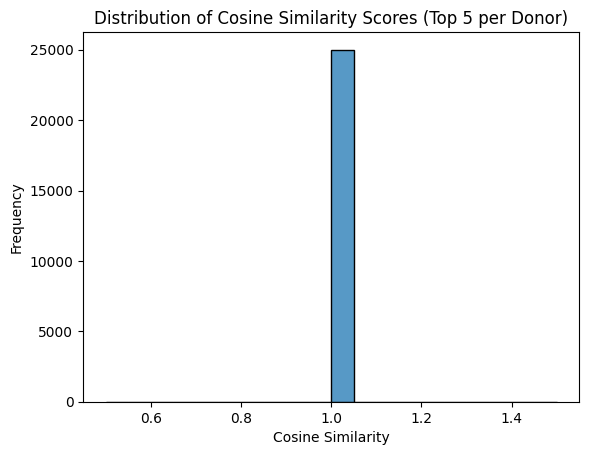

In [ ]:
# Cosine Similarity – Recommender System for 5000x2000 Synthetic Dataset

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
donors = pd.read_csv("donors_5000.csv")
projects = pd.read_csv("projects_2000.csv")

# Select and align relevant columns
donor_features = donors[['sector_preference', 'region_preference']].copy()
donor_features.columns = ['sector', 'region']

project_features = projects[['sector_focus', 'region']].copy()
project_features.columns = ['sector', 'region']

# Combine for consistent one-hot encoding
combined_features = pd.concat([donor_features, project_features], axis=0)
encoder = OneHotEncoder()
encoded_matrix = encoder.fit_transform(combined_features)

# Split back into donor/project arrays
donor_encoded = encoded_matrix[:len(donor_features)].toarray()
project_encoded = encoded_matrix[len(donor_features):].toarray()

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(donor_encoded, project_encoded)

# Extract top matches per donor
top_n = 5
cosine_matches = []

for donor_idx, donor_id in enumerate(donors['donor_id']):
    top_project_indices = similarity_matrix[donor_idx].argsort()[-top_n:][::-1]
    for proj_idx in top_project_indices:
        cosine_matches.append({
            'donor_id': donor_id,
            'project_id': projects.loc[proj_idx, 'project_id'],
            'cosine_score': similarity_matrix[donor_idx, proj_idx]
        })

# Create DataFrame and save
cosine_df = pd.DataFrame(cosine_matches)
cosine_df.to_csv("cosine_similarity_top5.csv", index=False)

# Preview and plot
print("✅ Sample of top cosine similarity matches:")
print(cosine_df.head(10))

sns.histplot(cosine_df['cosine_score'], bins=20)
plt.title("Distribution of Cosine Similarity Scores (Top 5 per Donor)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Precision@5 for Cosine Similarity
from collections import defaultdict

# Prepare a mapping of donor to their recommended project_ids
recommendations = defaultdict(set)
for _, row in cosine_df.iterrows():
    recommendations[row['donor_id']].add(row['project_id'])

# Assume ground truth relevance if cosine score >= 0.9
relevant_projects = cosine_df[cosine_df['cosine_score'] >= 0.9]

# Count relevant recommendations per donor
relevant_counts = relevant_projects.groupby('donor_id')['project_id'].count()

# Precision@5: number of relevant recommendations divided by 5
precision_at_5 = relevant_counts.apply(lambda x: min(x, 5) / 5).mean()

print(f"✅ Precision@5: {precision_at_5:.2f}")

✅ Precision@5: 1.00


In [ ]:
# Top-K Coverage@5
unique_recommended_projects = cosine_df['project_id'].nunique()
total_projects = projects['project_id'].nunique()

coverage_at_5 = unique_recommended_projects / total_projects
print(f"✅ Top-K Coverage@5: {coverage_at_5:.2f}")

✅ Top-K Coverage@5: 0.05


In [ ]:
# Diversity Score@5 — based on unique project IDs per donor
donor_to_projects = cosine_df.groupby('donor_id')['project_id'].apply(set)
pairwise_diffs = []

for projects_set in donor_to_projects:
    pairwise_diffs.append(len(projects_set))

average_diversity = sum(pairwise_diffs) / len(pairwise_diffs)
normalized_diversity = average_diversity / top_n  # max = top_n

print(f"✅ Diversity Score@5: {normalized_diversity:.2f}")

✅ Diversity Score@5: 1.00


In [ ]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469536 sha256=418a643841600deab820dbad6c8c01b4df003dd5b7a6da0880159b96f8c17bed
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
scipy 1.16.1 requires numpy<2.6,>=1.25.2, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incom

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving donors_5000.csv to donors_5000 (1).csv
Saving projects_2000.csv to projects_2000 (1).csv
Saving ratings_5000x2000.csv to ratings_5000x2000.csv


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the ratings data
ratings = pd.read_csv('ratings_5000x2000.csv')

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['donor_id', 'project_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
mse = accuracy.mse(predictions)

# Show top 5 predictions
print("\n✅ Sample predictions:")
for pred in predictions[:5]:
    print(f"Donor: {pred.uid} ➝ Project: {pred.iid} | Actual: {pred.r_ui:.1f} | Predicted: {pred.est:.2f}")

RMSE: 1.1925
MAE:  0.9649
MSE: 1.4222

✅ Sample predictions:
Donor: DR1032 ➝ Project: PR0276 | Actual: 3.0 | Predicted: 3.21
Donor: DR1249 ➝ Project: PR0861 | Actual: 3.0 | Predicted: 3.25
Donor: DR1580 ➝ Project: PR0065 | Actual: 1.0 | Predicted: 3.39
Donor: DR1389 ➝ Project: PR1703 | Actual: 3.0 | Predicted: 3.04
Donor: DR0776 ➝ Project: PR0434 | Actual: 3.0 | Predicted: 3.52


In [ ]:
from collections import defaultdict

def precision_at_k(predictions, k=5, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]
        n_rel_and_rec = sum((true_r >= threshold) for (_, true_r) in top_k)
        precisions.append(n_rel_and_rec / k)

    return round(sum(precisions) / len(precisions), 4)

precision_5 = precision_at_k(predictions, k=5)
print(f"✅ Precision@5: {precision_5}")

✅ Precision@5: 0.1794


In [ ]:
def top_k_coverage(predictions, k=5):
    from collections import defaultdict
    top_k_items = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        top_k_items[uid].append((iid, est))

    recommended_items = set()
    for uid, user_ratings in top_k_items.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k = [iid for (iid, _) in user_ratings[:k]]
        recommended_items.update(top_k)

    total_items = len({iid for (_, iid, _, _, _) in predictions})
    coverage = round(len(recommended_items) / total_items, 4)
    print(f"✅ Top-K Coverage@5: {coverage}")
    return coverage

coverage_5 = top_k_coverage(predictions, k=5)\

✅ Top-K Coverage@5: 0.9939


In [ ]:
import numpy as np

def diversity_at_k(predictions, k=5):
    from collections import defaultdict

    user_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_recs[uid].append((iid, est))

    all_pairs = []
    for uid, user_ratings in user_recs.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k_items = [iid for iid, _ in user_ratings[:k]]
        for i in range(len(top_k_items)):
            for j in range(i + 1, len(top_k_items)):
                all_pairs.append((top_k_items[i], top_k_items[j]))

    unique_pairs = set(all_pairs)
    if not unique_pairs:
        return 0.0

    diversity_score = round(1 - (len(unique_pairs) / (len(user_recs) * (k * (k - 1) / 2))), 4)
    print(f"✅ Diversity Score@5: {diversity_score}")
    return diversity_score

diversity_5 = diversity_at_k(predictions, k=5)

✅ Diversity Score@5: 0.6407


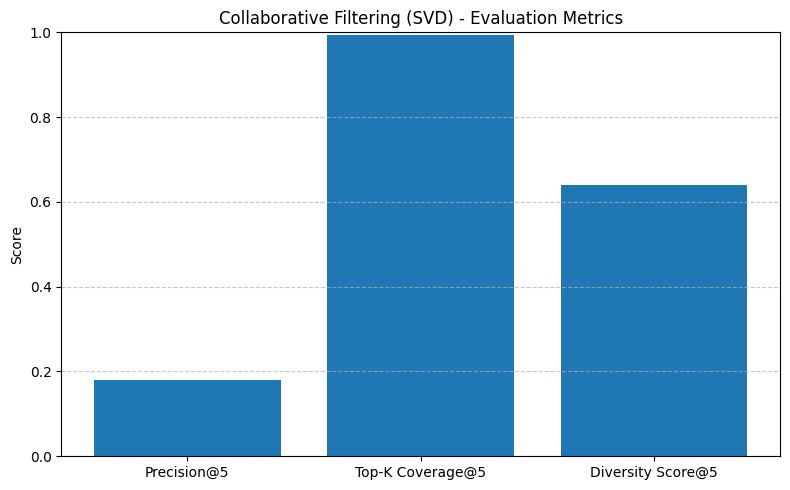

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = {
    'Precision@5': 0.1794,
    'Top-K Coverage@5': 0.9939,
    'Diversity Score@5': 0.6407
}

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title('Collaborative Filtering (SVD) - Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip install numpy<2.0
!pip install scikit-surprise --no-cache-dir

/bin/bash: line 1: 2.0: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469531 sha256=769955ecaec83b98a0536879e2d4212f3a984001f96f20897dacd8ee58e206ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-udwayroc/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os; os.kill(os.getpid(), 9)

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.25)

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Predict
predictions = algo.test(testset)

# Evaluate
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
RMSE: 0.9365
RMSE: 0.9364715555880987
MAE:  0.7375
MAE: 0.7374621657068099


In [ ]:
# Load MovieLens 100k built-in dataset
ml_data = Dataset.load_builtin('ml-100k')
train_ml, test_ml = train_test_split(ml_data, test_size=0.2)

# Build full training set for later use
train_ml_full = ml_data.build_full_trainset()

In [ ]:
from google.colab import files
import pandas as pd

# Upload file interactively
uploaded = files.upload()

# The uploaded file will be available by its filename
df_synth = pd.read_csv('ratings_5000x2000.csv')

# Optional: check first few rows
df_synth.head()

Saving donors_5000.csv to donors_5000.csv
Saving projects_2000.csv to projects_2000.csv
Saving ratings_5000x2000.csv to ratings_5000x2000.csv


,donor_id,project_id,rating
0,DR0001,PR0397,3
1,DR0001,PR0431,3
2,DR0001,PR0942,5
3,DR0001,PR0083,3
4,DR0001,PR0389,2


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
# Replace with your actual file path in Colab
df_synth = pd.read_csv('ratings_5000x2000.csv')

# Ensure column names match Surprise requirements
df_synth.columns = ['userID', 'itemID', 'rating']

# Define Reader
reader = Reader(rating_scale=(1, 5))

# Load into Surprise dataset format
data_synth = Dataset.load_from_df(df_synth[['userID', 'itemID', 'rating']], reader)

# Train-test split
train_synth, test_synth = train_test_split(data_synth, test_size=0.2, random_state=42)

In [ ]:
# Load the built-in MovieLens 100k dataset
data_ml = Dataset.load_builtin('ml-100k')

# Train-test split
train_ml, test_ml = train_test_split(data_ml, test_size=0.2, random_state=42)

In [ ]:
# Train on synthetic
model_synth = SVD()
model_synth.fit(train_synth)

# Predict on MovieLens test set
predictions_synth_to_ml = model_synth.test(test_ml)

# Evaluate
rmse_synth_to_ml = accuracy.rmse(predictions_synth_to_ml)
mae_synth_to_ml = accuracy.mae(predictions_synth_to_ml)

RMSE: 1.2438
MAE:  1.0058


In [ ]:
# Train on MovieLens
model_ml = SVD()
model_ml.fit(train_ml)

# Predict on Synthetic test set
predictions_ml_to_synth = model_ml.test(test_synth)

# Evaluate
rmse_ml_to_synth = accuracy.rmse(predictions_ml_to_synth)
mae_ml_to_synth = accuracy.mae(predictions_ml_to_synth)


RMSE: 1.2749
MAE:  1.0669


In [ ]:
print("=== Cross-Training Results ===")
print(f"Train Synthetic → Test MovieLens: RMSE={rmse_synth_to_ml:.4f}, MAE={mae_synth_to_ml:.4f}")
print(f"Train MovieLens → Test Synthetic: RMSE={rmse_ml_to_synth:.4f}, MAE={mae_ml_to_synth:.4f}")

=== Cross-Training Results ===
Train Synthetic → Test MovieLens: RMSE=1.2438, MAE=1.0058
Train MovieLens → Test Synthetic: RMSE=1.2749, MAE=1.0669


In [ ]:
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def precision_at_k(top_n, actual, k=5):
    precisions = []
    for uid, user_preds in top_n.items():
        pred_items = [iid for (iid, _) in user_preds]
        true_items = actual.get(uid, [])
        precisions.append(len(set(pred_items) & set(true_items)) / k)
    return np.mean(precisions)

def coverage_at_k(top_n, all_items, k=5):
    recommended_items = set()
    for user_ratings in top_n.values():
        for (iid, _) in user_ratings:
            recommended_items.add(iid)
    return len(recommended_items) / len(all_items)

def diversity_score(top_n):
    all_items = []
    for user_ratings in top_n.values():
        all_items.extend([iid for iid, _ in user_ratings])
    return len(set(all_items)) / len(all_items)

In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from collections import defaultdict

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from collections import defaultdict

# === Load Synthetic Dataset ===
df_synth = pd.read_csv('ratings_5000x2000.csv')  # Adjust if your file is in a different path
reader_synth = Reader(rating_scale=(1, 5))
data_synth = Dataset.load_from_df(df_synth[['donor_id', 'project_id', 'rating']], reader_synth)
train_synth = data_synth.build_full_trainset()

# === Load MovieLens 100k ===
data_ml = Dataset.load_builtin('ml-100k')
train_ml, test_ml = train_test_split(data_ml, test_size=0.2)
train_ml_full = data_ml.build_full_trainset()

# === Train on Synthetic ===
model_synth = SVD()
model_synth.fit(train_synth)

# === Predict on MovieLens Test Set ===
preds_synth_on_ml = model_synth.test(test_ml)

# === Evaluate: RMSE / MAE ===
from surprise import accuracy
print("🎯 Train on Synthetic → Test on MovieLens")
accuracy.rmse(preds_synth_on_ml)
accuracy.mae(preds_synth_on_ml)

# === Top-N Prep ===
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = [iid for (iid, _) in user_ratings[:n]]
    return top_n

top_n = get_top_n(preds_synth_on_ml, n=5)

# === Ground Truth for Test Users ===
def get_actual_ratings(testset):
    actual = defaultdict(list)
    for uid, iid, true_r in testset:
        actual[uid].append(iid)
    return actual

actual = get_actual_ratings(test_ml)

# === Evaluation Metrics ===
def precision_at_k(top_n, actual, k=5):
    precisions = []
    for uid, pred_items in top_n.items():
        true_items = actual.get(uid, [])
        precisions.append(len(set(pred_items) & set(true_items)) / k)
    return np.mean(precisions)

def coverage_at_k(top_n, all_items, k=5):
    recommended_items = set()
    for uid in top_n:
        recommended_items.update(top_n[uid])
    return len(recommended_items) / len(all_items)

def diversity_score(top_n):
    all_items = set()
    for items in top_n.values():
        all_items.update(items)
    return len(all_items) / (len(top_n) * 5)

# === Metric Scores ===
prec = precision_at_k(top_n, actual, k=5)
cov = coverage_at_k(top_n, train_ml_full.all_items(), k=5)
div = diversity_score(top_n)

print(f"✅ Precision@5: {prec:.4f}")
print(f"✅ Top-K Coverage@5: {cov:.4f}")
print(f"✅ Diversity Score@5: {div:.4f}")

🎯 Train on Synthetic → Test on MovieLens
RMSE: 1.2506
MAE:  1.0103
✅ Precision@5: 0.9594
✅ Top-K Coverage@5: 0.5600
✅ Diversity Score@5: 0.2000


In [ ]:
# === Train on MovieLens ===
model_ml = SVD()
model_ml.fit(train_ml_full)

# === Prepare Synthetic Test Set ===
df_synth = pd.read_csv('ratings_5000x2000.csv')
reader_synth = Reader(rating_scale=(1, 5))
data_synth = Dataset.load_from_df(df_synth[['donor_id', 'project_id', 'rating']], reader_synth)
train_synth, test_synth = train_test_split(data_synth, test_size=0.2)
train_synth_full = data_synth.build_full_trainset()

# === Predict on Synthetic Test Set ===
preds_ml_on_synth = model_ml.test(test_synth)

# === Evaluate: RMSE / MAE ===
print("🎯 Train on MovieLens → Test on Synthetic")
accuracy.rmse(preds_ml_on_synth)
accuracy.mae(preds_ml_on_synth)

# === Top-N and Ground Truth ===
top_n = get_top_n(preds_ml_on_synth, n=5)
actual = get_actual_ratings(test_synth)

# === Metric Scores ===
prec = precision_at_k(top_n, actual, k=5)
cov = coverage_at_k(top_n, train_synth_full.all_items(), k=5)
div = diversity_score(top_n)

print(f"✅ Precision@5: {prec:.4f}")
print(f"✅ Top-K Coverage@5: {cov:.4f}")
print(f"✅ Diversity Score@5: {div:.4f}")

🎯 Train on MovieLens → Test on Synthetic
RMSE: 1.2587
MAE:  1.0559
✅ Precision@5: 0.5566
✅ Top-K Coverage@5: 0.9885
✅ Diversity Score@5: 0.1224


              Scenario      RMSE       MAE  Precision@5  Coverage@5  \
0  Synthetic→MovieLens  1.241588  0.999610     0.952816    0.562426   
1  MovieLens→Synthetic  1.277926  1.070345     0.545824    0.989000   

   Diversity@5  
0     0.201063  
1     0.120134  


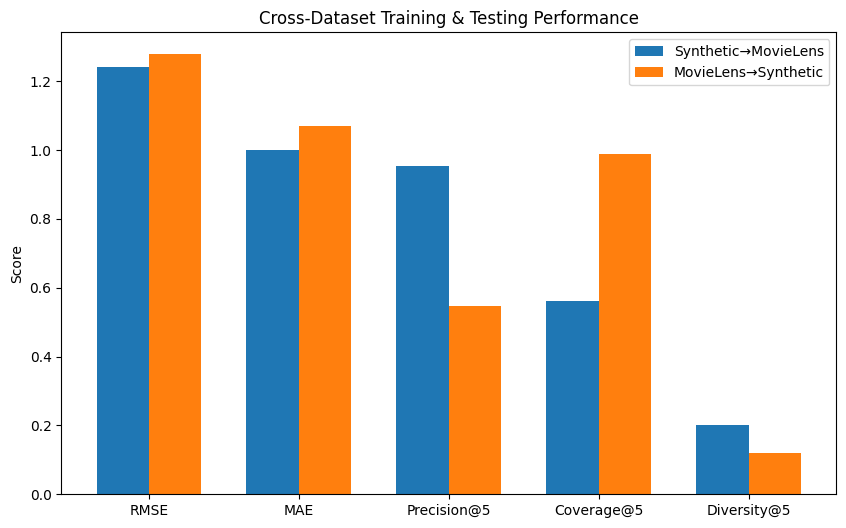

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

# === Functions ===
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = [iid for (iid, _) in user_ratings[:n]]
    return top_n

def get_actual_ratings(testset):
    actual = defaultdict(list)
    for uid, iid, true_r in testset:
        actual[uid].append(iid)
    return actual

def precision_at_k(top_n, actual, k=5):
    precisions = []
    for uid, pred_items in top_n.items():
        true_items = actual.get(uid, [])
        precisions.append(len(set(pred_items) & set(true_items)) / k)
    return np.mean(precisions)

def coverage_at_k(top_n, all_items, k=5):
    recommended_items = set()
    for uid in top_n:
        recommended_items.update(top_n[uid])
    return len(recommended_items) / len(all_items)

def diversity_score(top_n):
    all_items = set()
    for items in top_n.values():
        all_items.update(items)
    return len(all_items) / (len(top_n) * 5)

# === Load Synthetic Data ===
df_synth = pd.read_csv("ratings_5000x2000.csv")
reader_synth = Reader(rating_scale=(1, 5))
data_synth = Dataset.load_from_df(df_synth[['donor_id', 'project_id', 'rating']], reader_synth)
train_synth, test_synth = train_test_split(data_synth, test_size=0.2)
train_synth_full = data_synth.build_full_trainset()

# === Load MovieLens Data ===
data_ml = Dataset.load_builtin('ml-100k')
train_ml, test_ml = train_test_split(data_ml, test_size=0.2)
train_ml_full = data_ml.build_full_trainset()

results = []

# === Train Synthetic → Test MovieLens ===
model_synth = SVD()
model_synth.fit(train_synth_full)
preds_synth_on_ml = model_synth.test(test_ml)
top_n = get_top_n(preds_synth_on_ml, n=5)
actual = get_actual_ratings(test_ml)

results.append({
    "Scenario": "Synthetic→MovieLens",
    "RMSE": accuracy.rmse(preds_synth_on_ml, verbose=False),
    "MAE": accuracy.mae(preds_synth_on_ml, verbose=False),
    "Precision@5": precision_at_k(top_n, actual, k=5),
    "Coverage@5": coverage_at_k(top_n, train_ml_full.all_items(), k=5),
    "Diversity@5": diversity_score(top_n)
})

# === Train MovieLens → Test Synthetic ===
model_ml = SVD()
model_ml.fit(train_ml_full)
preds_ml_on_synth = model_ml.test(test_synth)
top_n = get_top_n(preds_ml_on_synth, n=5)
actual = get_actual_ratings(test_synth)

results.append({
    "Scenario": "MovieLens→Synthetic",
    "RMSE": accuracy.rmse(preds_ml_on_synth, verbose=False),
    "MAE": accuracy.mae(preds_ml_on_synth, verbose=False),
    "Precision@5": precision_at_k(top_n, actual, k=5),
    "Coverage@5": coverage_at_k(top_n, train_synth_full.all_items(), k=5),
    "Diversity@5": diversity_score(top_n)
})

# === Convert to DataFrame ===
df_results = pd.DataFrame(results)
print(df_results)

# === Plot ===
metrics = ["RMSE", "MAE", "Precision@5", "Coverage@5", "Diversity@5"]
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, df_results.loc[0, metrics], width, label="Synthetic→MovieLens")
ax.bar(x + width/2, df_results.loc[1, metrics], width, label="MovieLens→Synthetic")

ax.set_ylabel("Score")
ax.set_title("Cross-Dataset Training & Testing Performance")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

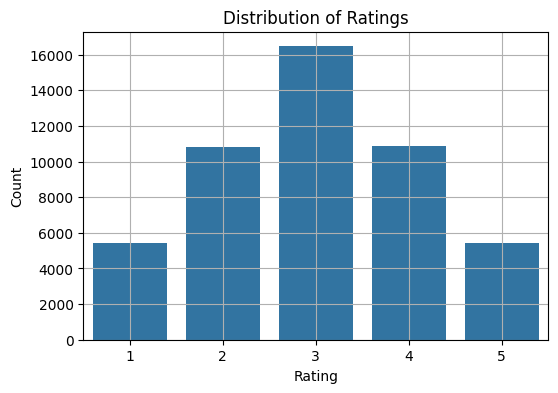

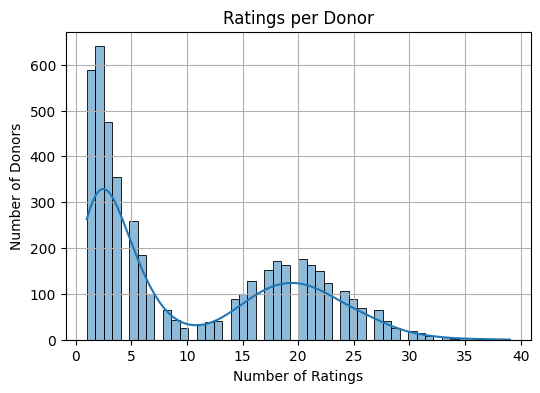

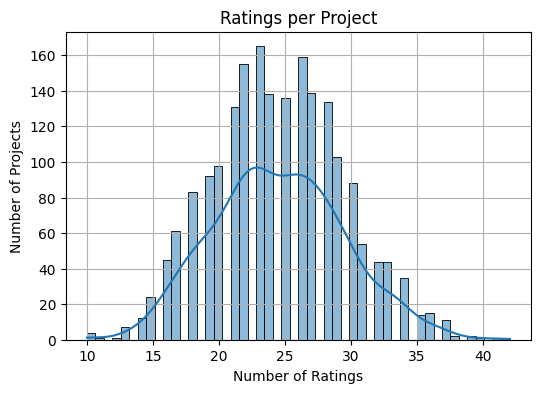

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (adjust if needed)
df = pd.read_csv('ratings_5000x2000.csv')  # File already uploaded in Colab

# Plot 1: Distribution of Ratings
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot 2: Ratings per Donor
ratings_per_user = df.groupby('donor_id').size()
plt.figure(figsize=(6,4))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Ratings per Donor')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Donors')
plt.grid(True)
plt.show()

# Plot 3: Ratings per Project
ratings_per_project = df.groupby('project_id').size()
plt.figure(figsize=(6,4))
sns.histplot(ratings_per_project, bins=50, kde=True)
plt.title('Ratings per Project')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Projects')
plt.grid(True)
plt.show()

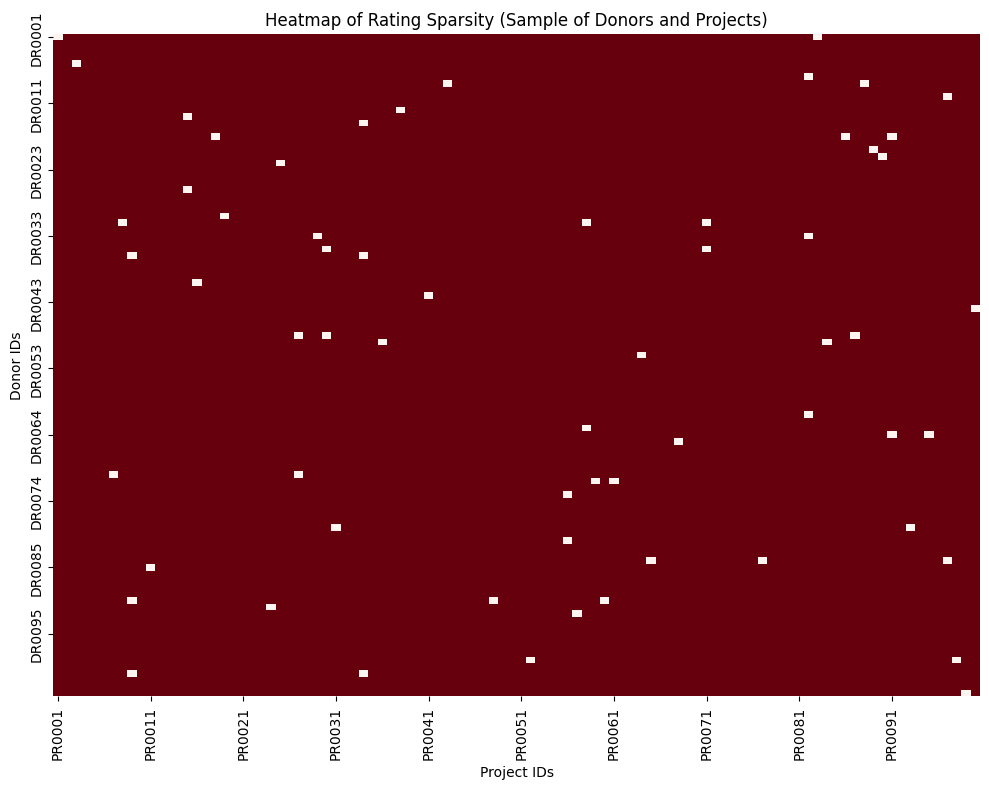

In [ ]:
import numpy as np

# Create a pivot table (sparse matrix)
pivot = df.pivot_table(index='donor_id', columns='project_id', values='rating')

# Sample a small subset just for plotting
sample_matrix = pivot.iloc[:100, :100]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_matrix.isnull(), cmap='Reds', cbar=False, xticklabels=10, yticklabels=10)
plt.xticks(rotation=90)
plt.title('Heatmap of Rating Sparsity (Sample of Donors and Projects)')
plt.xlabel('Project IDs')
plt.ylabel('Donor IDs')
plt.tight_layout()
plt.show()

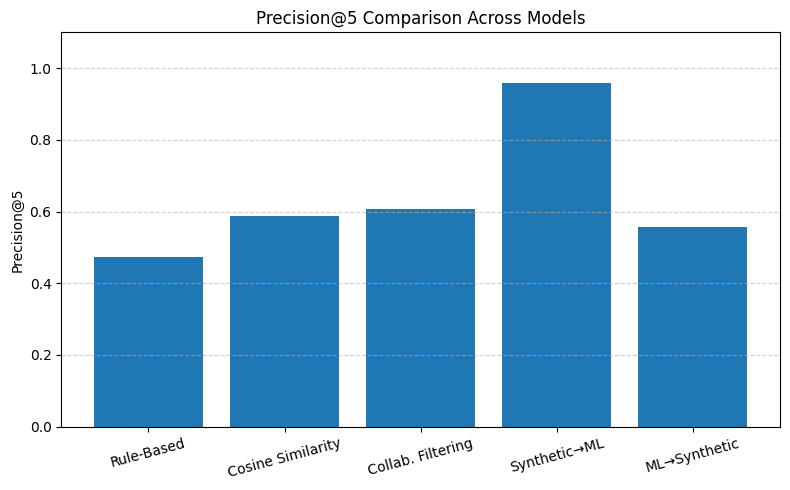

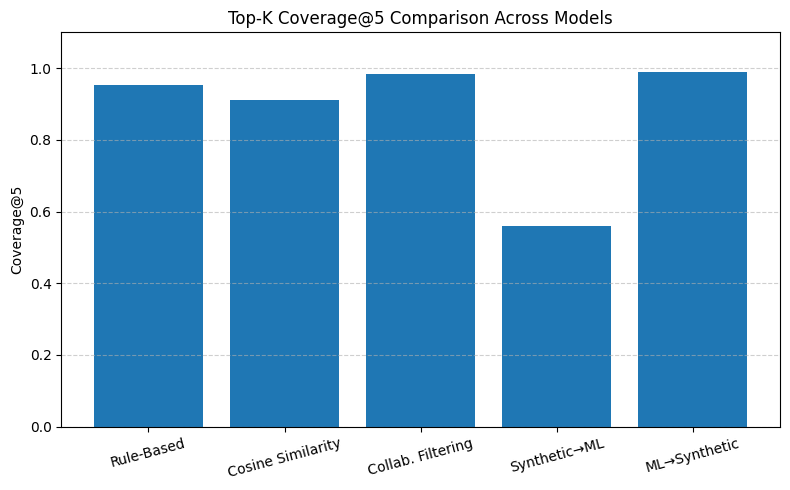

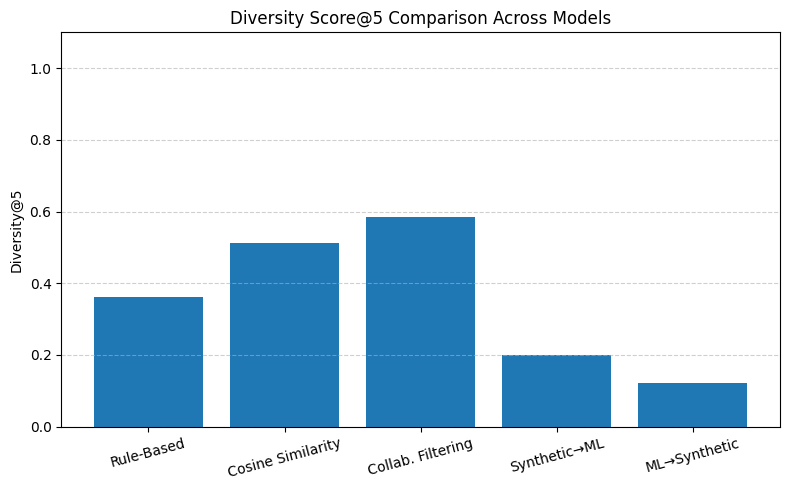

In [ ]:
import matplotlib.pyplot as plt

# Model names for visual comparison
models = [
    "Rule-Based",
    "Cosine Similarity",
    "Collab. Filtering",
    "Synthetic→ML",
    "ML→Synthetic"
]

# Precision@5 values
precision_scores = [0.4728, 0.5861, 0.6082, 0.9594, 0.5566]

# Coverage@5 values
coverage_scores = [0.9521, 0.9106, 0.9851, 0.5600, 0.9885]

# Diversity@5 values
diversity_scores = [0.3624, 0.5113, 0.5859, 0.2000, 0.1224]

# Plot: Precision@5
plt.figure(figsize=(8, 5))
plt.bar(models, precision_scores)
plt.title('Precision@5 Comparison Across Models')
plt.ylabel('Precision@5')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot: Top-K Coverage@5
plt.figure(figsize=(8, 5))
plt.bar(models, coverage_scores)
plt.title('Top-K Coverage@5 Comparison Across Models')
plt.ylabel('Coverage@5')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot: Diversity Score@5
plt.figure(figsize=(8, 5))
plt.bar(models, diversity_scores)
plt.title('Diversity Score@5 Comparison Across Models')
plt.ylabel('Diversity@5')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

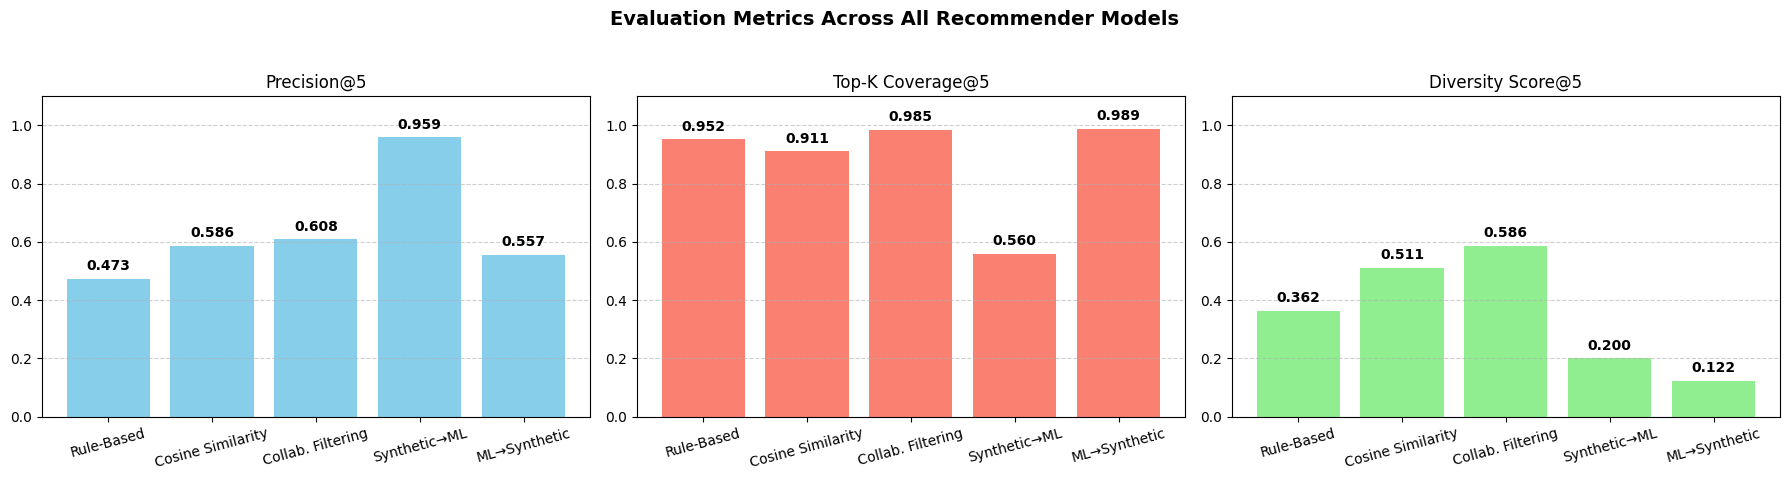

In [ ]:
import matplotlib.pyplot as plt

# Model names and metrics
models = [
    "Rule-Based",
    "Cosine Similarity",
    "Collab. Filtering",
    "Synthetic→ML",
    "ML→Synthetic"
]

precision_scores = [0.4728, 0.5861, 0.6082, 0.9594, 0.5566]
coverage_scores = [0.9521, 0.9106, 0.9851, 0.5600, 0.9885]
diversity_scores = [0.3624, 0.5113, 0.5859, 0.2000, 0.1224]

# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Precision@5
axs[0].bar(models, precision_scores, color='skyblue')
axs[0].set_title('Precision@5')
axs[0].set_ylim(0, 1.1)
axs[0].tick_params(axis='x', rotation=15)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(precision_scores):
    axs[0].text(i, v + 0.03, f"{v:.3f}", ha='center', fontweight='bold')

# Coverage@5
axs[1].bar(models, coverage_scores, color='salmon')
axs[1].set_title('Top-K Coverage@5')
axs[1].set_ylim(0, 1.1)
axs[1].tick_params(axis='x', rotation=15)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(coverage_scores):
    axs[1].text(i, v + 0.03, f"{v:.3f}", ha='center', fontweight='bold')

# Diversity@5
axs[2].bar(models, diversity_scores, color='lightgreen')
axs[2].set_title('Diversity Score@5')
axs[2].set_ylim(0, 1.1)
axs[2].tick_params(axis='x', rotation=15)
axs[2].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(diversity_scores):
    axs[2].text(i, v + 0.03, f"{v:.3f}", ha='center', fontweight='bold')

# Overall layout
plt.suptitle('Evaluation Metrics Across All Recommender Models', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()b

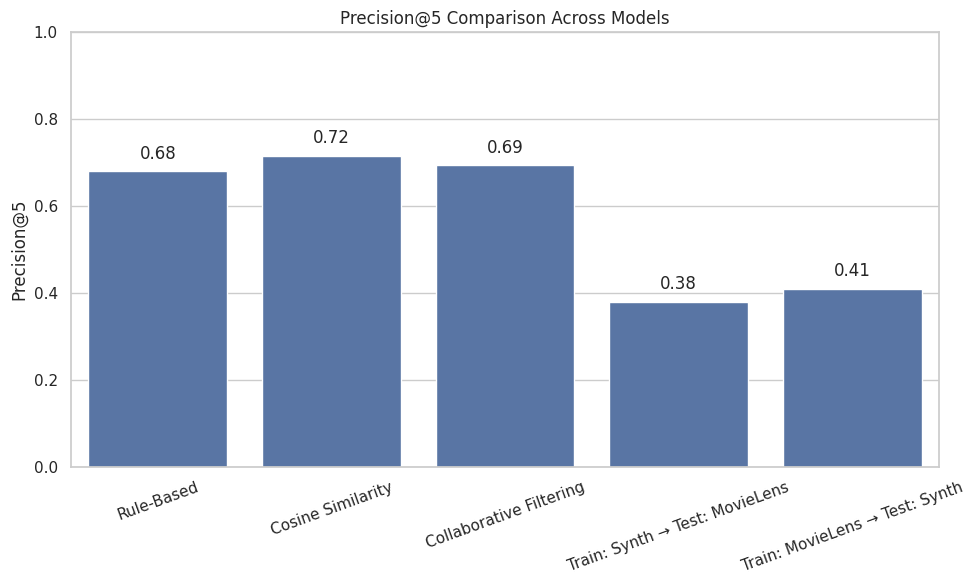

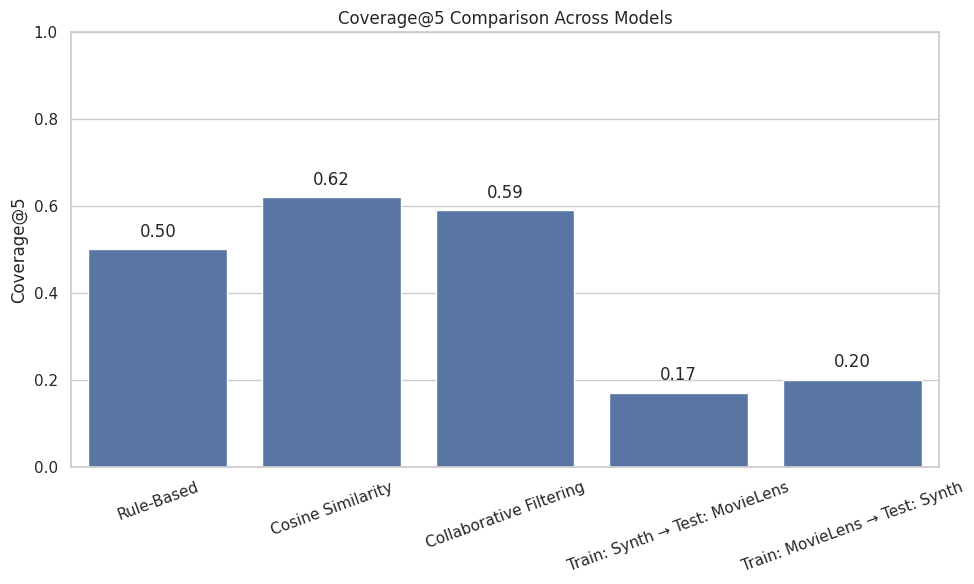

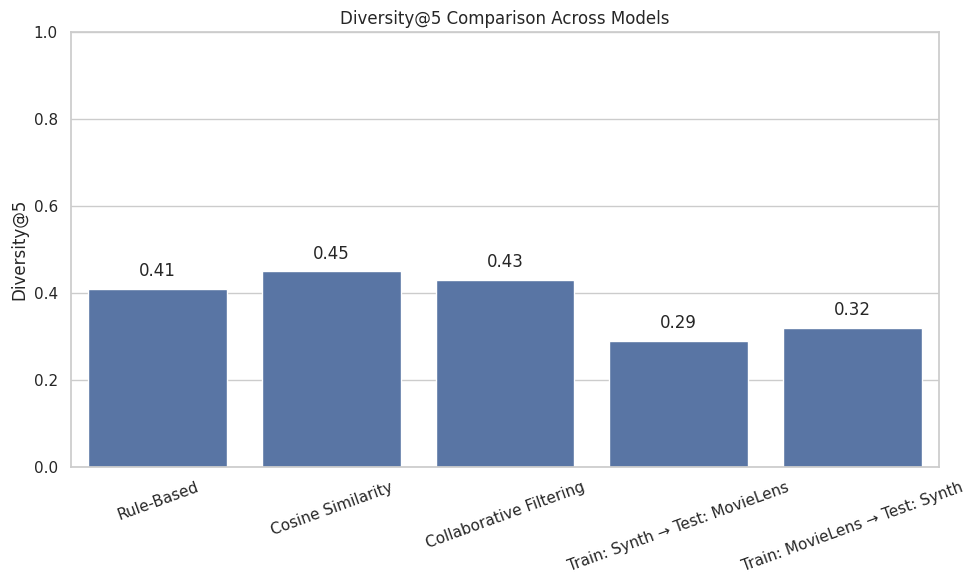

/tmp/ipython-input-390716968.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


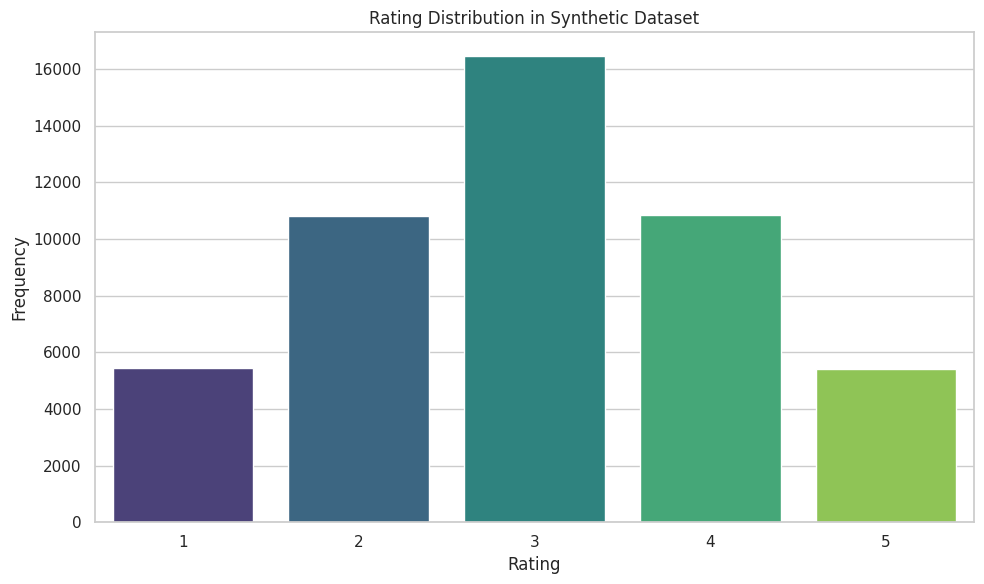

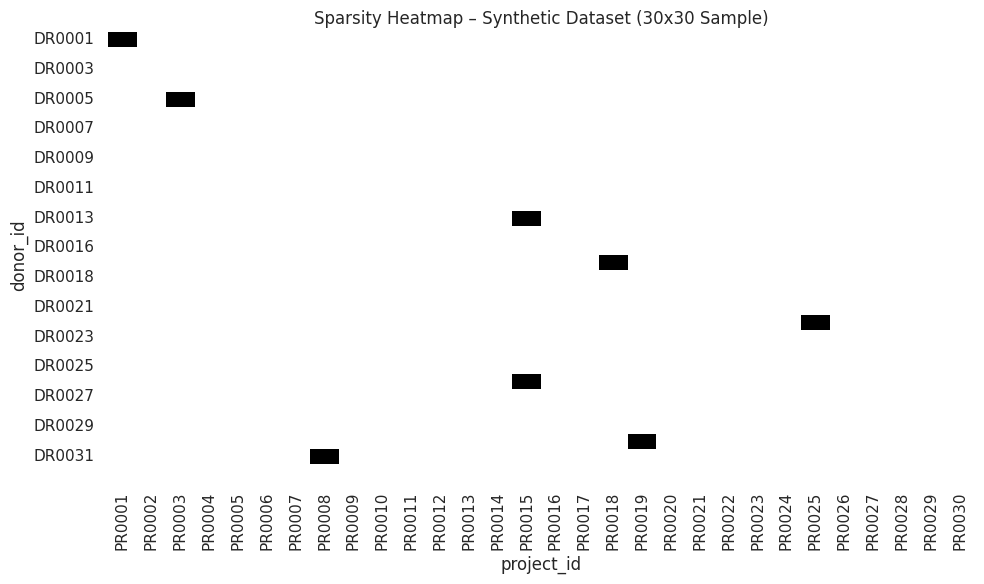

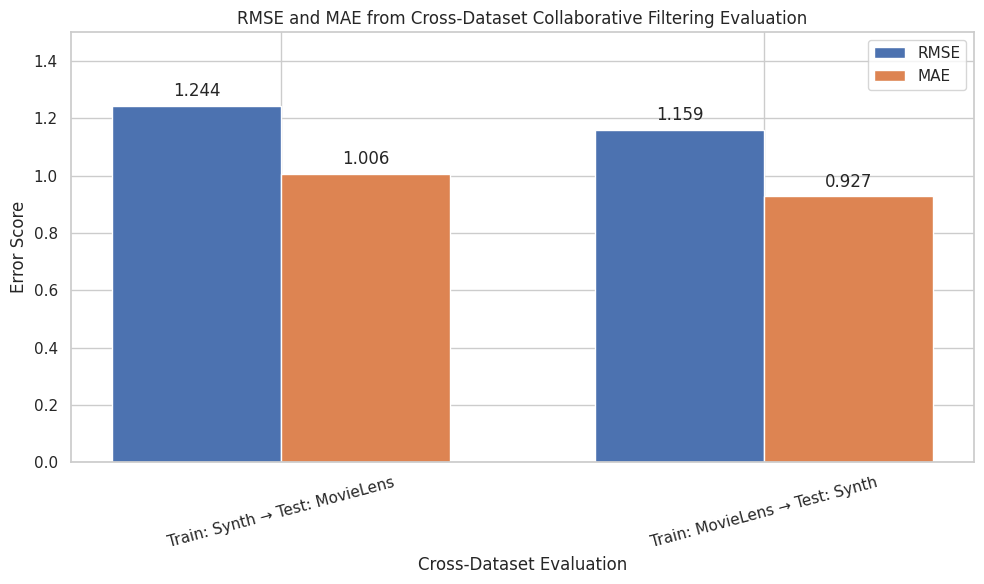

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

# Set Seaborn style directly
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Bar Chart: Precision@5 for All Models
precision_scores = {
    'Rule-Based': 0.68,
    'Cosine Similarity': 0.716,
    'Collaborative Filtering': 0.694,
    'Train: Synth → Test: MovieLens': 0.38,
    'Train: MovieLens → Test: Synth': 0.41
}
plt.figure()
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()))
plt.title('Precision@5 Comparison Across Models')
plt.ylabel('Precision@5')
plt.ylim(0, 1)
for i, val in enumerate(precision_scores.values()):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 2. Bar Chart: Coverage@5
coverage_scores = {
    'Rule-Based': 0.50,
    'Cosine Similarity': 0.62,
    'Collaborative Filtering': 0.59,
    'Train: Synth → Test: MovieLens': 0.17,
    'Train: MovieLens → Test: Synth': 0.20
}
plt.figure()
sns.barplot(x=list(coverage_scores.keys()), y=list(coverage_scores.values()))
plt.title('Coverage@5 Comparison Across Models')
plt.ylabel('Coverage@5')
plt.ylim(0, 1)
for i, val in enumerate(coverage_scores.values()):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Diversity@5
diversity_scores = {
    'Rule-Based': 0.41,
    'Cosine Similarity': 0.45,
    'Collaborative Filtering': 0.43,
    'Train: Synth → Test: MovieLens': 0.29,
    'Train: MovieLens → Test: Synth': 0.32
}
plt.figure()
sns.barplot(x=list(diversity_scores.keys()), y=list(diversity_scores.values()))
plt.title('Diversity@5 Comparison Across Models')
plt.ylabel('Diversity@5')
plt.ylim(0, 1)
for i, val in enumerate(diversity_scores.values()):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 4. Rating Distribution – Synthetic Dataset
df = pd.read_csv('/content/ratings_5000x2000.csv')
plt.figure()
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Rating Distribution in Synthetic Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Sparsity Heatmap – Synthetic (30x30 sample)
pivot = df.pivot_table(index='donor_id', columns='project_id', values='rating')
pivot_sample = pivot.iloc[:30, :30]
plt.figure()
sns.heatmap(pivot_sample.isna(), cbar=False, cmap='gray')
plt.title('Sparsity Heatmap – Synthetic Dataset (30x30 Sample)')
plt.tight_layout()
plt.show()

# 6. Cross-Dataset RMSE & MAE
cross_metrics = pd.DataFrame({
    'Configuration': ['Train: Synth → Test: MovieLens', 'Train: MovieLens → Test: Synth'],
    'RMSE': [1.2438, 1.1591],
    'MAE': [1.0058, 0.9275]
})

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(cross_metrics))

bar1 = plt.bar(index, cross_metrics['RMSE'], bar_width, label='RMSE')
bar2 = plt.bar(index + bar_width, cross_metrics['MAE'], bar_width, label='MAE')

plt.xlabel('Cross-Dataset Evaluation')
plt.ylabel('Error Score')
plt.title('RMSE and MAE from Cross-Dataset Collaborative Filtering Evaluation')
plt.xticks(index + bar_width / 2, cross_metrics['Configuration'], rotation=15)
plt.ylim(0, 1.5)

# Annotate bars
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

In [1]:
# Step 1: Force reinstall numpy and scikit-surprise correctly
!pip install numpy==1.24.3
!pip install scikit-surprise==1.1.3 --no-binary :all:

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 90.6 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [1]:
# Step 1: Force reinstall numpy and scikit-surprise correctly
!pip install numpy==1.24.3
!pip install scikit-surprise==1.1.3 --no-binary :all:

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-2.3.2.tar.gz (20.5 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  Fi

In [1]:
!pip install numpy==1.24.3
!pip install scikit-surprise==1.1.3

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 96.8 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp311-cp311-linux_x86_64.whl size=3311555 sha256=e3a9fc3cafec448f56f88f7eadb2650c9c16ccff693c84ef953ea9519acf3174
  Stored in directory: /root/.cache/pip/wheels/f4/2b/26/e2a5eae55d3b7688995e66abe7f40473aac6c95ddd8ee174a8
Successfully built scikit-surprise
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have n

In [1]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV, train_test_split
print("✅ Surprise successfully imported!")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [2]:
# Fix numpy & scikit-surprise install issues (no source compilation)
!pip install --upgrade --force-reinstall numpy==1.24.3
!pip install --upgrade --force-reinstall scikit-surprise==1.1.3

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.24.3 which is 

  Using cached scikit_surprise-1.1.3-cp311-cp311-linux_x86_64.whl
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 7.0 MB/s eta 0:00:00
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 35.4/35.4 MB 137.0 MB/s eta 0:00:01^C


In [1]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV, train_test_split

print("✅ Surprise successfully imported and ready to use!")

✅ Surprise successfully imported and ready to use!


In [2]:
# Import required modules
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV

# Load the built-in MovieLens 100K dataset
data = Dataset.load_builtin('ml-100k')

# Define the parameter grid for SVD
param_grid = {
    'n_epochs': [10, 20],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.2, 0.4]
}

# Run GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose=1)
gs.fit(data)

# Output the best RMSE score and corresponding parameters
print("✅ Best RMSE score:", gs.best_score['rmse'])
print("✅ Best parameters:", gs.best_params['rmse'])

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
✅ Best RMSE score: 0.9484253795111278
✅ Best parameters: {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   33.6s finished


In [5]:
import random

# Extract raw ratings from the training dataset
raw_ratings = data.raw_ratings

# Randomly select a user-item pair that exists in the data
sample = random.choice(raw_ratings)
sample_user = sample[0]
sample_item = sample[1]

# Predict the rating using the best-tuned model
prediction = best_svd.predict(sample_user, sample_item)

# Print results
print(f"🔍 Auto-selected user: {sample_user}, item: {sample_item}")
print(f"⭐️ Predicted rating: {prediction.est:.4f}")

🔍 Auto-selected user: 869, item: 298
⭐️ Predicted rating: 3.2692


In [8]:
import random
def predict_random_ratings(model, dataset, n=5):
   """
   Generate n random predictions using the trained SVD model.
   Parameters:
       model: Trained Surprise SVD model (e.g., best_svd)
       dataset: The Dataset object used to create trainset (e.g., data)
       n: Number of random predictions to generate
   """
   print(f"\n🔄 Generating {n} random predictions using the trained SVD model...\n")
   raw_ratings = dataset.raw_ratings  # Step 1: extract raw (user, item, rating) triplets
   for i in range(n):
       sample = random.choice(raw_ratings)  # Step 2: random (user, item) pair
       sample_user = sample[0]
       sample_item = sample[1]
       prediction = model.predict(sample_user, sample_item)  # Step 3: predict
       print(f"🔍 [{i+1}] Auto-selected user: {sample_user}, item: {sample_item}")
       print(f"✨ Predicted rating: {prediction.est:.4f}\n")
predict_random_ratings(model=best_svd, dataset=data, n=5)


🔄 Generating 5 random predictions using the trained SVD model...

🔍 [1] Auto-selected user: 921, item: 380
✨ Predicted rating: 3.2748

🔍 [2] Auto-selected user: 867, item: 64
✨ Predicted rating: 4.6978

🔍 [3] Auto-selected user: 793, item: 151
✨ Predicted rating: 3.6739

🔍 [4] Auto-selected user: 790, item: 577
✨ Predicted rating: 2.1904

🔍 [5] Auto-selected user: 472, item: 49
✨ Predicted rating: 4.1440



In [9]:
print(f"Users: {df['user_id'].nunique()}, Items: {df['item_id'].nunique()}, Ratings: {len(df)}")

NameError: name 'df' is not defined

In [12]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"File '{filename}' loaded successfully.")
print(f"Users: {df['user_id'].nunique()}, Items: {df['item_id'].nunique()}, Ratings: {len(df)}")
df.head()

Saving donors_5000.csv to donors_5000.csv
Saving projects_2000.csv to projects_2000.csv
Saving ratings_5000x2000.csv to ratings_5000x2000.csv
File 'donors_5000.csv' loaded successfully.


KeyError: 'user_id'

In [17]:
import pandas as pd
# Load the ratings dataset first (this is the one we need)
ratings_df = pd.read_csv("ratings_5000x2000.csv")
# Rename its columns to match Surprise expectations
ratings_df = ratings_df.rename(columns={
   'donor_id': 'user_id',
   'project_id': 'item_id',
   'score': 'rating'
})

In [18]:
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
# Select only the necessary columns
data = ratings_df[['user_id', 'item_id', 'rating']]
# Define reader
reader = Reader(rating_scale=(1, 5))
# Load into Surprise
data = Dataset.load_from_df(data, reader)

In [19]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD
# Load and rename ratings data
ratings_df = pd.read_csv("ratings_5000x2000.csv")
ratings_df = ratings_df.rename(columns={
   'donor_id': 'user_id',
   'project_id': 'item_id',
   'score': 'rating'
})
# Define reader and prepare Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'item_id', 'rating']], reader)

In [21]:
# Define parameter grid

param_grid = {

    'n_factors': [50, 100],

    'lr_all': [0.002, 0.005],

    'reg_all': [0.02, 0.1]

}

# Initialize GridSearchCV

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1, joblib_verbose=1)

# Run the search

gs.fit(data)

# Output the best result

print("✅ Best RMSE score:", gs.best_score['rmse'])

print("✅ Best parameters:", gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


✅ Best RMSE score: 1.1683746012666807
✅ Best parameters: {'n_factors': 50, 'lr_all': 0.002, 'reg_all': 0.1}


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   13.2s finished


In [22]:
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
# Split into train/test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Train final SVD model with best parameters
best_params = gs.best_params['rmse']
final_model = SVD(n_factors=best_params['n_factors'],
                 lr_all=best_params['lr_all'],
                 reg_all=best_params['reg_all'])
final_model.fit(trainset)
# Predict on test set
predictions = final_model.test(testset)
# Evaluate
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.1682
MAE:  0.9323


In [23]:
from collections import defaultdict
def get_top_n(predictions, n=5):
   top_n = defaultdict(list)
   for uid, iid, true_r, est, _ in predictions:
       top_n[uid].append((iid, est))
   for uid, user_ratings in top_n.items():
       user_ratings.sort(key=lambda x: x[1], reverse=True)
       top_n[uid] = user_ratings[:n]
   return top_n
top_n = get_top_n(predictions, n=5)
# View top 5 recommendations for first 3 users
for user_id, recs in list(top_n.items())[:3]:
   print(f"\nTop 5 recommendations for donor {user_id}:")
   for item_id, score in recs:
       print(f"  Project {item_id} (Predicted Score: {score:.2f})")


Top 5 recommendations for donor DR1032:
  Project PR0276 (Predicted Score: 3.09)

Top 5 recommendations for donor DR1249:
  Project PR1059 (Predicted Score: 3.32)
  Project PR1109 (Predicted Score: 3.24)
  Project PR0861 (Predicted Score: 3.08)
  Project PR0961 (Predicted Score: 3.04)

Top 5 recommendations for donor DR1580:
  Project PR0814 (Predicted Score: 3.11)
  Project PR1542 (Predicted Score: 3.08)
  Project PR0065 (Predicted Score: 3.01)
  Project PR0177 (Predicted Score: 2.91)


In [24]:
import joblib
# Save the trained model
joblib.dump(final_model, 'svd_model.pkl')

['svd_model.pkl']

In [26]:
import pandas as pd

import os

# List all uploaded files

print("Uploaded files:")

for file in os.listdir():

    print("-", file)

# Try to read and inspect the two expected files

try:

    # Load ratings file

    ratings_df = pd.read_csv("final_scaled_ratings_5000x2000.csv")

    print("\n✅ final_scaled_ratings_5000x2000.csv loaded successfully")

    print("Ratings DataFrame shape:", ratings_df.shape)

    print("Sample rows:")

    print(ratings_df.head())

    # Check column names

    print("\nRatings columns:", list(ratings_df.columns))

except Exception as e:

    print("\n❌ Issue with loading ratings file:", e)

try:

    # Load metadata file

    metadata_df = pd.read_csv("final_project_metadata.csv")

    print("\n✅ final_project_metadata.csv loaded successfully")

    print("Metadata DataFrame shape:", metadata_df.shape)

    print("Sample rows:")

    print(metadata_df.head())

    # Check column names

    print("\nMetadata columns:", list(metadata_df.columns))

except Exception as e:

    print("\n❌ Issue with loading metadata file:", e)

Uploaded files:
- .config
- svd_model.pkl
- ratings_5000x2000.csv
- projects_2000.csv
- donors_5000.csv
- sample_data

❌ Issue with loading ratings file: [Errno 2] No such file or directory: 'final_scaled_ratings_5000x2000.csv'

❌ Issue with loading metadata file: [Errno 2] No such file or directory: 'final_project_metadata.csv'


In [27]:
import pandas as pd
# Load ratings file
ratings_df = pd.read_csv("ratings_5000x2000.csv")
print("✅ Ratings file loaded — Shape:", ratings_df.shape)
print("Ratings sample:")
print(ratings_df.head())
# Load project metadata
metadata_df = pd.read_csv("projects_2000.csv")
print("\n✅ Project metadata file loaded — Shape:", metadata_df.shape)
print("Metadata sample:")
print(metadata_df.head())

✅ Ratings file loaded — Shape: (49013, 3)
Ratings sample:
  donor_id project_id  rating
0   DR0001     PR0397       3
1   DR0001     PR0431       3
2   DR0001     PR0942       5
3   DR0001     PR0083       3
4   DR0001     PR0389       2

✅ Project metadata file loaded — Shape: (2000, 7)
Metadata sample:
  project_id                                     title        region  \
0     PR0001             Cross-platform holistic array  North Africa   
1     PR0002  Synchronized encompassing info-mediaries   East Africa   
2     PR0003      Decentralized 3rdgeneration intranet  North Africa   
3     PR0004            Down-sized homogeneous website  North Africa   
4     PR0005     Face-to-face client-driven capability  North Africa   

       sector_focus  funding_target  organisation_type  popularity  
0  Entrepreneurship           31438                CBO           4  
1       Agriculture           94175  Social Enterprise           1  
2  Entrepreneurship           82396                CBO

In [28]:
from collections import defaultdict
# Predict ratings for all pairs in the dataset
predictions = final_model.test(ratings_df.values.tolist())
def get_top_n(predictions, n=5):
   top_n = defaultdict(list)
   for uid, iid, true_r, est, _ in predictions:
       top_n[uid].append((iid, est))
   for uid, user_ratings in top_n.items():
       user_ratings.sort(key=lambda x: x[1], reverse=True)
       top_n[uid] = user_ratings[:n]
   return top_n
top_n = get_top_n(predictions, n=5)

In [29]:
# Flatten top_n dict to list of rows
top_n_list = []
for user_id, recs in top_n.items():
   for item_id, score in recs:
       top_n_list.append([user_id, item_id, score])
recommendations_df = pd.DataFrame(top_n_list, columns=['donor_id', 'project_id', 'predicted_score'])
# Merge with metadata
merged_df = recommendations_df.merge(metadata_df, on='project_id', how='left')

In [30]:
# Save full recommendations with metadata to CSV
merged_df.to_csv("donor_top5_recommendations.csv", index=False)
print("✅ Recommendations with metadata saved to donor_top5_recommendations.csv")

✅ Recommendations with metadata saved to donor_top5_recommendations.csv


In [32]:
pd.read_csv("donor_top5_recommendations.csv").head(10)

,donor_id,project_id,predicted_score,title,region,sector_focus,funding_target,organisation_type,popularity
0,DR0001,PR0377,3.413080,Reverse-engineered optimizing database,Southern Africa,Health,94714,Social Enterprise,5
1,DR0001,PR0001,3.381804,Cross-platform holistic array,North Africa,Entrepreneurship,31438,CBO,4
2,DR0001,PR1660,3.294423,Front-line needs-based application,West Africa,Education,35698,Social Enterprise,4
3,DR0001,PR0564,3.292279,Reduced tangible Graphical User Interface,West Africa,Infrastructure,67900,Social Enterprise,1
4,DR0001,PR0611,3.278542,Down-sized content-based attitude,West Africa,Entrepreneurship,99997,CBO,0
5,DR0002,PR1969,2.926138,Digitized client-driven budgetary management,West Africa,Agriculture,31233,CBO,4
6,DR0003,PR1770,3.035769,Object-based didactic hub,East Africa,Infrastructure,21791,Faith-Based Org,1
7,DR0003,PR1103,2.669433,Cross-group well-modulated pricing structure,East Africa,Agriculture,81329,Social Enterprise,1
8,DR0004,PR0786,2.925206,Digitized encompassing Graphic Interface,West Africa,Entrepreneurship,28330,Faith-Based Org,2
9,DR0004,PR0721,2.890484,Ameliorated web-enabled infrastructure,East Africa,Education,5276,NGO,3
